In [2]:
## 1.1 import libarary
## data manipulatioon and analysis
import pandas  as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## visualization library
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 
from plotly.subplots import make_subplots 

## statistical analysis
from scipy import stats
from scipy.stats import chi2_contingency,pearsonr,spearmanr
## machine learning 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")




In [3]:
## Load dataset
df = pd.read_csv('hyperlocal_economy_data (1).csv')


In [4]:
print(f"data shape: {df.shape[0]} rows * {df.shape[1]} columns")

data shape: 200 rows * 35 columns


In [5]:
## memory usage
print(f"{df.memory_usage(deep=True).sum()/1024**2} MB")

0.21905994415283203 MB


In [6]:
## first look into the data
#print(df.head())

In [7]:
display(df.head())

,area_id,area_name,city,area_type,locality_type,pincode,retail_shops,restaurants,banks_atms,medical_facilities,educational_centers,parking_lots,vacant_shops,pedestrian_count_15min,vehicle_count_15min,footfall_intensity,road_condition,street_lighting,cleanliness,avg_daily_customers,avg_transaction_value,monthly_rent,business_growth,property_price_sqft,residential_rent_1bhk,property_trend,google_rating,google_reviews_count,zomato_restaurants,population_estimate,last_survey_date,competition_level,parking_availability,main_issue,news_mentions_6months
0,AREA_001,Sector 17 Market,Patiala,Urban,Commercial,143684.00,43.00,27.00,10.00,5,4,3.00,3,275,149,High,5.00,5,4.00,130.00,1324,31848.00,Growing,6245,19108.00,Falling,4.50,670.00,27.00,37039.00,2025-01-05,High,Easy,Poor infrastructure,13.00
1,AREA_002,Sector 22,Chandigarh,Semi-Urban,Mixed,141220.00,25.00,13.00,7.00,5,1,0.00,4,116,51,Medium,3.00,3,3.00,76.00,763,16898.00,Growing,4807,10138.00,Falling,4.10,1453.00,13.00,33023.00,2025-01-23,Low,Easy,High rent,9.00
2,AREA_003,Sector 35,Patiala,Urban,Commercial,NaN,NaN,NaN,NaN,4,3,NaN,NaN,NaN,177,NaN,6.00,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Falling,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN,NaN
3,AREA_004,Sector 43,Patiala,Urban,Commercial,148023.00,51.00,21.00,12.00,8,6,4.00,6,278,104,High,4.00,4,4.00,181.00,1175,40822.00,Growing,7361,24493.00,Rising,4.30,2483.00,21.00,30350.00,2025-01-17,High,Moderate,High rent,16.00
4,AREA_005,Sector 8,Zirakpur,Urban,Mixed,148450.00,28.00,17.00,10.00,7,5,3.00,1,144,67,Medium,5.00,4,4.00,78.00,1388,33258.00,Growing,6404,19954.00,Falling,3.40,1897.00,17.00,46404.00,2025-01-07,High,Moderate,High rent,8.00


In [8]:
display(df.sample(5))

,area_id,area_name,city,area_type,locality_type,pincode,retail_shops,restaurants,banks_atms,medical_facilities,educational_centers,parking_lots,vacant_shops,pedestrian_count_15min,vehicle_count_15min,footfall_intensity,road_condition,street_lighting,cleanliness,avg_daily_customers,avg_transaction_value,monthly_rent,business_growth,property_price_sqft,residential_rent_1bhk,property_trend,google_rating,google_reviews_count,zomato_restaurants,population_estimate,last_survey_date,competition_level,parking_availability,main_issue,news_mentions_6months
135,AREA_136,Banur Zone 2,Zirakpur,Rural,Residential,148158.00,8.00,6.00,2.00,5,4,2.00,0,28,9,Low,3.00,2,3.00,18.00,919,6842.00,Growing,2201,4105.00,Falling,3.60,2080.00,6.00,13009.00,2025-01-27,High,Easy,Low footfall,13.00
113,AREA_114,Industrial Area Phase 2 Zone 2,Panchkula,Urban,Residential,NaN,NaN,NaN,NaN,7,5,NaN,0shops,NaN,7,Medium,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rising,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,NaN
109,AREA_110,Sector 34 Zone 2,Ludhiana,Semi-Urban,Commercial,145580.00,20.00,14.00,7.00,1,5,0.00,1,92,31,Medium,3.00,3,2.00,39.00,834,21047.00,Growing,3910,12628.00,Falling,3.70,879.00,14.00,34359.00,2025-01-10,Low,Difficult,Low footfall,2.00
72,AREA_073,Sarabha Nagar,Chandigarh,Rural,Mixed,149992.00,9.00,5.00,2.00,6,5,2.00,0,37,22,Low,3.00,3,3.00,12.00,1478,5096.00,Stable,2547,3057.00,Stable,3.20,858.00,5.00,12732.00,2025-01-11,Medium,Difficult,High rent,2.00
195,AREA_196,Nilokheri Zone 2,Karnal,Semi-Urban,Mixed,142156.00,32.00,15.00,7.00,3,2,2.00,5,103,40,Medium,3.00,4,2.00,57.00,631,21479.00,Declining,4906,12887.00,Rising,3.30,502.00,15.00,25022.00,2025-01-19,Low,Difficult,High rent,11.00


In [9]:
## phase 2 
## data understanding and quality assess.
print("DATASET INFO:")
df.info()

DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   area_id                 200 non-null    object 
 1   area_name               200 non-null    object 
 2   city                    200 non-null    object 
 3   area_type               200 non-null    object 
 4   locality_type           200 non-null    object 
 5   pincode                 182 non-null    float64
 6   retail_shops            188 non-null    float64
 7   restaurants             185 non-null    float64
 8   banks_atms              175 non-null    float64
 9   medical_facilities      200 non-null    int64  
 10  educational_centers     200 non-null    int64  
 11  parking_lots            162 non-null    float64
 12  vacant_shops            192 non-null    object 
 13  pedestrian_count_15min  185 non-null    object 
 14  vehicle_count_15min     200 

In [10]:
column_info=pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes.values,
    'non-null count': df.count().values,
    'null count':df.isnull().sum().values
})

display(column_info)

,Column,Data Type,non-null count,null count
0,area_id,object,200,0
1,area_name,object,200,0
2,city,object,200,0
3,area_type,object,200,0
4,locality_type,object,200,0
5,pincode,float64,182,18
6,retail_shops,float64,188,12
7,restaurants,float64,185,15
8,banks_atms,float64,175,25
9,medical_facilities,int64,200,0


In [11]:
## Observation template
print("KEY OBSERVATION:")
print(f"total vriables:{df.shape[1]}")
print(f"numerical varibales: {df.select_dtypes(include=[np.number]).shape[1]}")
print(f"total categorical columns:{df.select_dtypes(include=object).shape[1]}")
print(f"total missing values: {df.isnull().sum().sum()}")
print(f" duplicate rows: {df.duplicated().sum()}")

KEY OBSERVATION:
total vriables:35
numerical varibales: 19
total categorical columns:16
total missing values: 484
 duplicate rows: 0


In [12]:
## stat summary
display(df.describe().T.style.background_gradient(cmap='YlOrRd'))

,count,mean,std,min,25%,50%,75%,max
pincode,182.000000,144888.532967,2945.368259,140030.000000,142427.000000,144589.500000,147537.000000,149992.000000
retail_shops,188.000000,28.595745,16.528258,5.000000,16.750000,25.000000,34.000000,69.000000
restaurants,185.000000,13.172973,8.015767,2.000000,8.000000,11.000000,15.000000,34.000000
banks_atms,175.000000,6.457143,2.745350,2.000000,4.000000,7.000000,8.000000,12.000000
medical_facilities,200.000000,4.300000,2.191807,1.000000,3.000000,4.000000,6.000000,9.000000
educational_centers,200.000000,3.575000,1.611633,1.000000,2.000000,4.000000,5.000000,7.000000
parking_lots,162.000000,2.160494,1.482459,0.000000,1.000000,2.000000,3.000000,5.000000
vehicle_count_15min,200.000000,57.805000,40.913525,7.000000,30.000000,48.000000,71.000000,183.000000
road_condition,193.000000,3.725389,0.990700,2.000000,3.000000,4.000000,4.000000,6.000000
street_lighting,200.000000,3.695000,0.839942,2.000000,3.000000,4.000000,4.000000,5.000000


In [13]:
display(df.describe(include=object).T.style.background_gradient(cmap='YlOrRd'))

,count,unique,top,freq
area_id,200,200,AREA_001,1
area_name,200,196,Sector 9 Zone 2,2
city,200,12,Zirakpur,25
area_type,200,3,Semi-Urban,102
locality_type,200,3,Commercial,84
vacant_shops,192,16,3,40
pedestrian_count_15min,185,114,111,6
footfall_intensity,192,3,Medium,122
avg_transaction_value,175,161,1486,3
business_growth,182,3,Declining,91


In [14]:
##missing value analysis
missing_data=pd.DataFrame({
    'Column': df.columns,
    'missing_counts':df.isnull().sum().values,
    'missing_perct':(df.isnull().sum()/len(df)*100).round(2).values
})

In [15]:
display(missing_data)

,Column,missing_counts,missing_perct
0,area_id,0,0.00
1,area_name,0,0.00
2,city,0,0.00
3,area_type,0,0.00
4,locality_type,0,0.00
5,pincode,18,9.00
6,retail_shops,12,6.00
7,restaurants,15,7.50
8,banks_atms,25,12.50
9,medical_facilities,0,0.00


In [16]:
missing_data=missing_data[missing_data['missing_counts']>0].sort_values('missing_perct')

In [17]:
display(missing_data)

,Column,missing_counts,missing_perct
16,road_condition,7,3.50
12,vacant_shops,8,4.00
15,footfall_intensity,8,4.00
6,retail_shops,12,6.00
29,population_estimate,12,6.00
18,cleanliness,12,6.00
7,restaurants,15,7.50
30,last_survey_date,15,7.50
13,pedestrian_count_15min,15,7.50
21,monthly_rent,15,7.50


<Figure size 1200x600 with 0 Axes>

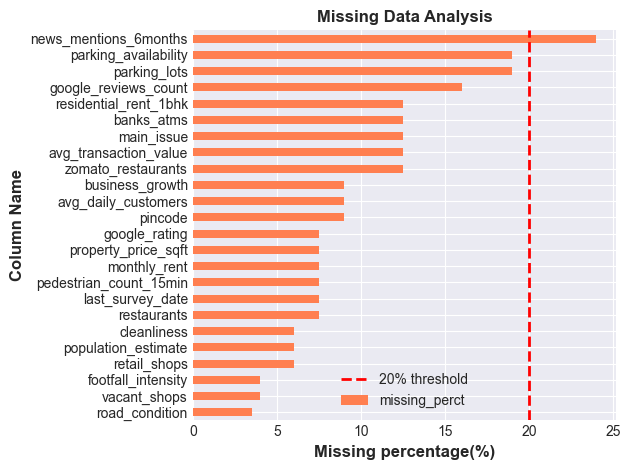

In [18]:
## viz missing data
plt.figure(figsize=(12,6))
missing_data.plot(kind='barh',x='Column',y='missing_perct',color='coral')
plt.xlabel('Missing percentage(%)',fontsize=12,fontweight='bold')
plt.ylabel('Column Name',fontsize=12, fontweight='bold')
plt.title('Missing Data Analysis',fontsize=12,fontweight='bold')
plt.axvline(x=20, color='red',linestyle='--',linewidth=2,label='20% threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
for col in df.select_dtypes(include='object').columns:
    ## check for the datetime format
    datetime_conv=pd.to_datetime(df[col],errors='coerce')
    ## if most of the valuee are date time
    if datetime_conv.notna().mean() > 0.8:
        print(f"column {col} is stored as object but should be datetime")
        # sample values
        print(f" sample values: {df[col].dropna().head(3).tolist()}")
        print('--'*50)

        ## check for numeric columns
    numeric_conv=pd.to_numeric(df[col],errors='coerce')
    if numeric_conv.notna().mean() > 0.8:
        print(f"column {col} is stored as object but should be numeric")
        print(f" sample values: {df[col].dropna().head(3).tolist()}")
        print(f"Numric conversion sucess count: {numeric_conv.notna().sum()}")
        print('--'*50)

       

column vacant_shops is stored as object but should be numeric
 sample values: ['3', '4', '6']
Numric conversion sucess count: 188
----------------------------------------------------------------------------------------------------
column pedestrian_count_15min is stored as object but should be numeric
 sample values: ['275', '116', '278']
Numric conversion sucess count: 181
----------------------------------------------------------------------------------------------------
column avg_transaction_value is stored as object but should be numeric
 sample values: ['1324', '763', '1175']
Numric conversion sucess count: 168
----------------------------------------------------------------------------------------------------
column property_price_sqft is stored as object but should be numeric
 sample values: ['6245', '4807', '7361']
Numric conversion sucess count: 181
----------------------------------------------------------------------------------------------------
column last_survey_date is 

In [20]:
## 3 Data cleaning and processing
# 3.1 create data backup
df_raw=df.copy()
print(f"Backup shape: {df_raw.shape}")

Backup shape: (200, 35)


In [21]:
## fix data types
## function to clean numeric data
def clean_numeric_columns(series,column_name):
    print(f" cleaning: {column_name}")
    print(f" before-type: {series.dtype},sample: {series.dropna().head(2).tolist}")
    ## convert to string
    series=series.astype(str)
    ## remove common patterns 
    series=series.str.replace('Rs','',regex=False)
    series=series.str.replace('/-','',regex=False)
    series=series.str.replace('~','',regex=False)
    series=series.str.replace('shops','',regex=False)
    series=series.str.replace(' ','',regex=False)

    series = series.str.strip()

    # replace "NA", "nan", etc with NaN
    series=series.replace(['NA','na','nan','NaN','None',''],np.nan)
    ## convert ot numeric
    series=pd.to_numeric(series,errors='coerce')

    ## after cleaning status
    print(f'After-type: {series.dtype}, sample: {series.dropna().head(2).tolist()}')
    print("conversion complete")
    return series


In [22]:
## call your function
df['avg_transaction_value']=clean_numeric_columns(df['avg_transaction_value'],'avg_transaction_value')
print('--'*50)
df['vacant_shops']=clean_numeric_columns(df['vacant_shops'],'vacant_shops')
print('--'*50)
df['pedestrian_count_15min']=clean_numeric_columns(df['pedestrian_count_15min'],'pedestrian_count')
print('--'*50)
df['property_price_sqft']=clean_numeric_columns(df['property_price_sqft'],'property_price_sqft')

 cleaning: avg_transaction_value
 before-type: object,sample: <bound method IndexOpsMixin.tolist of 0    1324
1     763
Name: avg_transaction_value, dtype: object>
After-type: float64, sample: [1324.0, 763.0]
conversion complete
----------------------------------------------------------------------------------------------------
 cleaning: vacant_shops
 before-type: object,sample: <bound method IndexOpsMixin.tolist of 0    3
1    4
Name: vacant_shops, dtype: object>
After-type: float64, sample: [3.0, 4.0]
conversion complete
----------------------------------------------------------------------------------------------------
 cleaning: pedestrian_count
 before-type: object,sample: <bound method IndexOpsMixin.tolist of 0    275
1    116
Name: pedestrian_count_15min, dtype: object>
After-type: float64, sample: [275.0, 116.0]
conversion complete
----------------------------------------------------------------------------------------------------
 cleaning: property_price_sqft
 before-type: o

In [23]:
## Standardize date format
#function
def standardize_date(date_series):
    date_series=pd.to_datetime(date_series,errors='coerce',format='mixed',dayfirst=True)
    return date_series



In [24]:
df['last_survey_date']=standardize_date(df['last_survey_date'])
print(f"sample values : {df['last_survey_date'].dropna().head(3).tolist()}")

sample values : [Timestamp('2025-01-05 00:00:00'), Timestamp('2025-01-23 00:00:00'), Timestamp('2025-01-17 00:00:00')]


In [25]:
# Handle missing values
# Fill numeric columns 
numeric_cols_to_fill=['retail_shops','restaurants','banks_atms','medical_facilities','parking_lots','monthly_rent']
for col in numeric_cols_to_fill:
    if col in df.columns and df[col].isnull().sum() > 0:
        # fill with median group by area_type locality_type	
        df['col']=df.groupby(['area_type','locality_type'])[col].transform(lambda x: x.fillna(x.median()))
        print(f'{col} : Filled {df[col].isnull().sum()} missing values with group median')




retail_shops : Filled 12 missing values with group median
restaurants : Filled 15 missing values with group median
banks_atms : Filled 25 missing values with group median
parking_lots : Filled 38 missing values with group median
monthly_rent : Filled 15 missing values with group median


In [26]:
## Fill categorical columns with mode
categorical_cols_to_fill= ['footfall_intensity','business_growth','parking_availability','main_issue']
for col in categorical_cols_to_fill:
    if col in df.columns and df[col].isnull().sum() >0:
        mode_value= df[col].mode()[0] if len (df[col].mode()) > 0 else 'Unknown'
        df[col].fillna(mode_value,inplace=True)
        print(f" {col}: filled with mode ({mode_value})")


 footfall_intensity: filled with mode (Medium)
 business_growth: filled with mode (Declining)
 parking_availability: filled with mode (Easy)
 main_issue: filled with mode (High rent)


In [27]:
## KNN IMPUTATION CORRELATED NUMERIC FEATURE
correlated_features=['pedestrian_count_15min','vehicle_count_15min','avg_daily_customers','avg_transaction_value']
if any(df[col].isnull().sum() > 0 for col in correlated_features if col in df.columns ):
    ## KNNImputation
    imputer=KNNImputer(n_neighbors=5)
    df[correlated_features]=imputer.fit_transform(df[correlated_features])

In [28]:
## check the remaining missing values
remaining_missing=df.isnull().sum().sum()
print(f" Reaminig missing values are : {remaining_missing}")

 Reaminig missing values are : 337


In [29]:
## cleaning impact
print(f"""
Before cleaning :
{df_raw.isnull().sum().sum()}
({df_raw.isnull().sum().sum()/(df_raw.shape[0]*df_raw.shape[1])*100})

After cleaning :
{df.isnull().sum().sum()}
({df.isnull().sum().sum()/(df.shape[0]*df.shape[1])*100})
""")


Before cleaning :
484
(6.914285714285715)

After cleaning :
337
(4.680555555555556)



,Column,Outlier_count
0,retail_shops,14
1,monthly_rent,13
2,property_price_sqft,11
3,pedestrian_count_15min,31


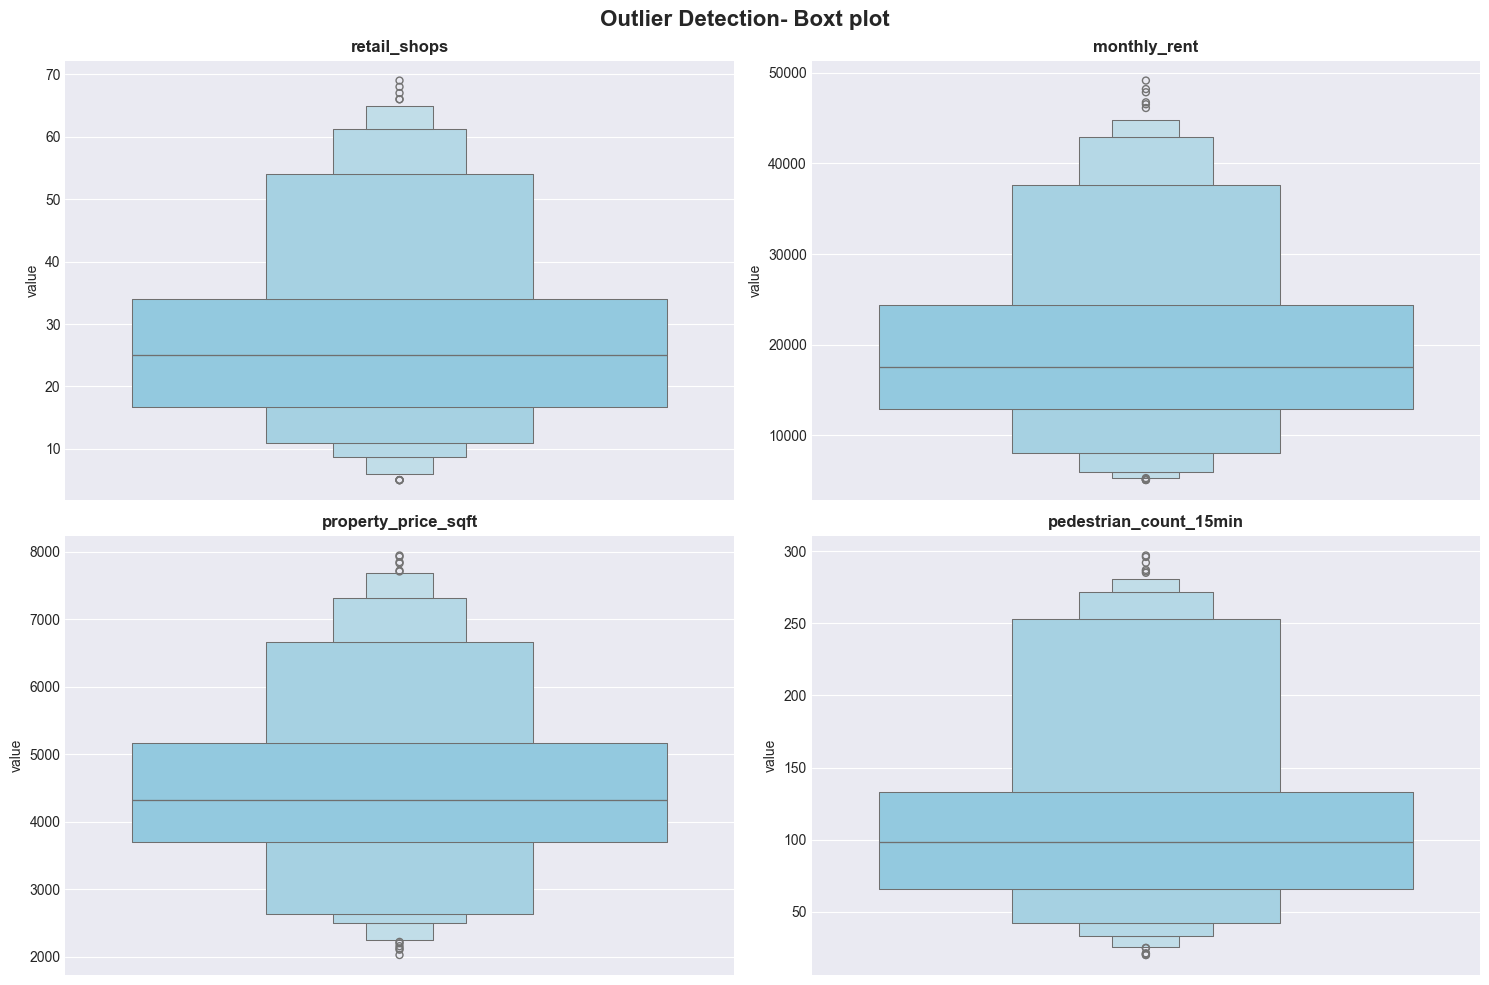

In [30]:
## outlier detection
# function to detect the outliers using IQR methode
def detect_outliers_iqr(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5* IQR
    upper_bound=Q3+1.5* IQR
    outliers=df[(df[column] < lower_bound) | (df[column]> upper_bound)]
    return outliers, lower_bound, upper_bound



## check key numeric col for outliers
outliers_columns=['retail_shops','monthly_rent','property_price_sqft','pedestrian_count_15min']
outlier_summary=[]
for col in outliers_columns:
    if col in df.columns:
        outliers, lower_bound, upper_bound = detect_outliers_iqr(df,col)
        outlier_summary.append({
            'Column':col,
            'Outlier_count':len(outliers)
        })
outlier_df=pd.DataFrame(outlier_summary)
display(outlier_df)

## visualize outliers
import matplotlib.pyplot as plt
fig,axes= plt.subplots(2,2,figsize=(15,10))
fig.suptitle('Outlier Detection- Boxt plot',fontsize=16,fontweight='bold')
for idx, col in enumerate(outliers_columns):
    if col in df.columns:
        ax=axes[idx//2,idx%2]
        sns.boxenplot(y=df[col],ax=ax,color='skyblue')
        ax.set_title(f"{col}",fontsize=12,fontweight='bold')
        ax.set_ylabel('value')
plt.tight_layout()
plt.show()


In [31]:
##apply winsoriation to extreme outliers
from scipy.stats.mstats import winsorize
extreme_outlier_cols=['monthly_rent','property_price_sqft']
for col in extreme_outlier_cols:
    if col in df.columns:
        df[f'{col}_capped']=winsorize(df[col],limits=[0.05,0.05])
        print(f"{col} caped to 5th and 95th percentiles")

monthly_rent caped to 5th and 95th percentiles
property_price_sqft caped to 5th and 95th percentiles


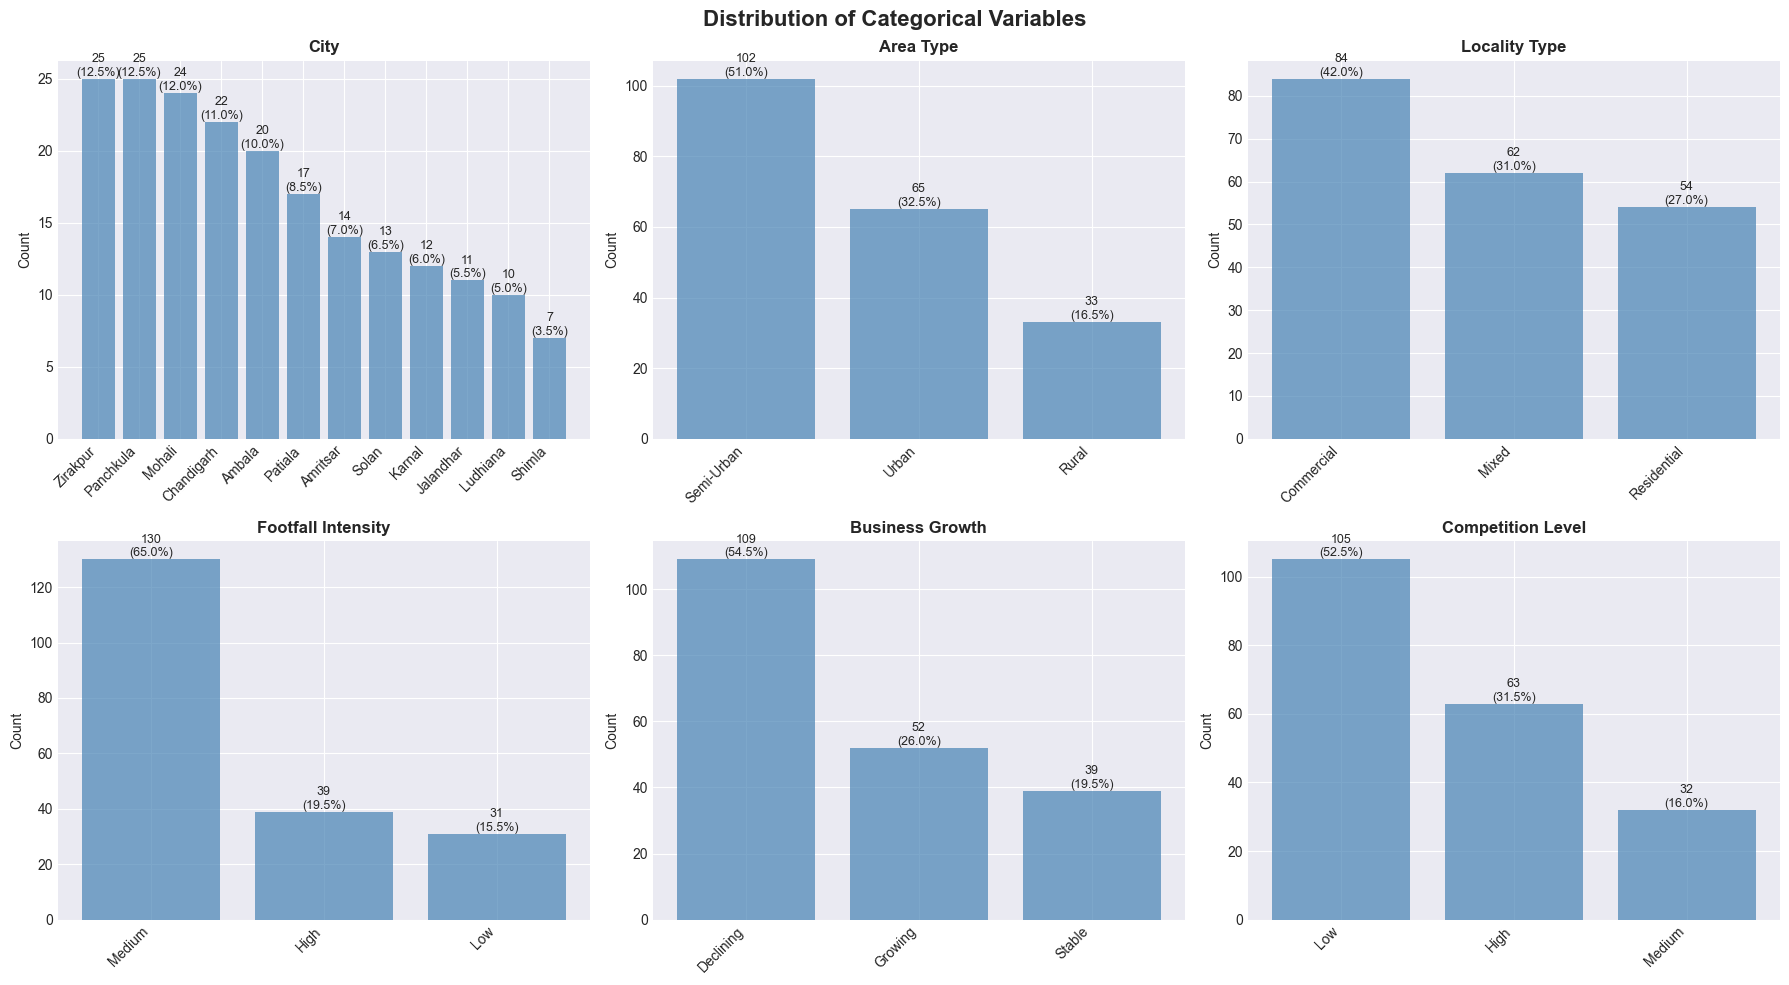

In [32]:


# Key categorical variables
categorical_vars = ['city', 'area_type', 'locality_type', 'footfall_intensity', 
                    'business_growth', 'competition_level']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of Categorical Variables', fontsize=16, fontweight='bold')

for idx, var in enumerate(categorical_vars):
    if var in df.columns:
        ax = axes[idx//3, idx%3]
        
        # Count and percentage
        value_counts = df[var].value_counts()
        percentages = (value_counts / len(df) * 100).round(1)
        
        # Plot
        bars = ax.bar(range(len(value_counts)), value_counts.values, color='steelblue', alpha=0.7)
        ax.set_xticks(range(len(value_counts)))
        ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
        ax.set_title(f'{var.replace("_", " ").title()}', fontweight='bold')
        ax.set_ylabel('Count')
        
        # Add percentage labels
        for i, (bar, pct) in enumerate(zip(bars, percentages)):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{int(height)}\n({pct}%)',
                   ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [33]:

# City distribution
city_dist = df['city'].value_counts()
print(f"\n1. GEOGRAPHIC DISTRIBUTION:")
print(f"   - Most surveyed city: {city_dist.index[0]} ({city_dist.values[0]} locations)")
print(f"   - Coverage: {len(city_dist)} cities across Punjab-Haryana")

# Area type distribution
area_dist = df['area_type'].value_counts(normalize=True) * 100
print(f"\n2. AREA TYPE BREAKDOWN:")
for area, pct in area_dist.items():
    print(f"   - {area}: {pct:.1f}%")

# Business growth trends
growth_dist = df['business_growth'].value_counts(normalize=True) * 100
print(f"\n3. BUSINESS GROWTH SENTIMENT:")
for growth, pct in growth_dist.items():
    print(f"   - {growth}: {pct:.1f}%")

print(f"\n INSIGHT: {growth_dist.iloc[0]:.1f}% of areas show '{growth_dist.index[0]}' trend!")


1. GEOGRAPHIC DISTRIBUTION:
   - Most surveyed city: Zirakpur (25 locations)
   - Coverage: 12 cities across Punjab-Haryana

2. AREA TYPE BREAKDOWN:
   - Semi-Urban: 51.0%
   - Urban: 32.5%
   - Rural: 16.5%

3. BUSINESS GROWTH SENTIMENT:
   - Declining: 54.5%
   - Growing: 26.0%
   - Stable: 19.5%

 INSIGHT: 54.5% of areas show 'Declining' trend!


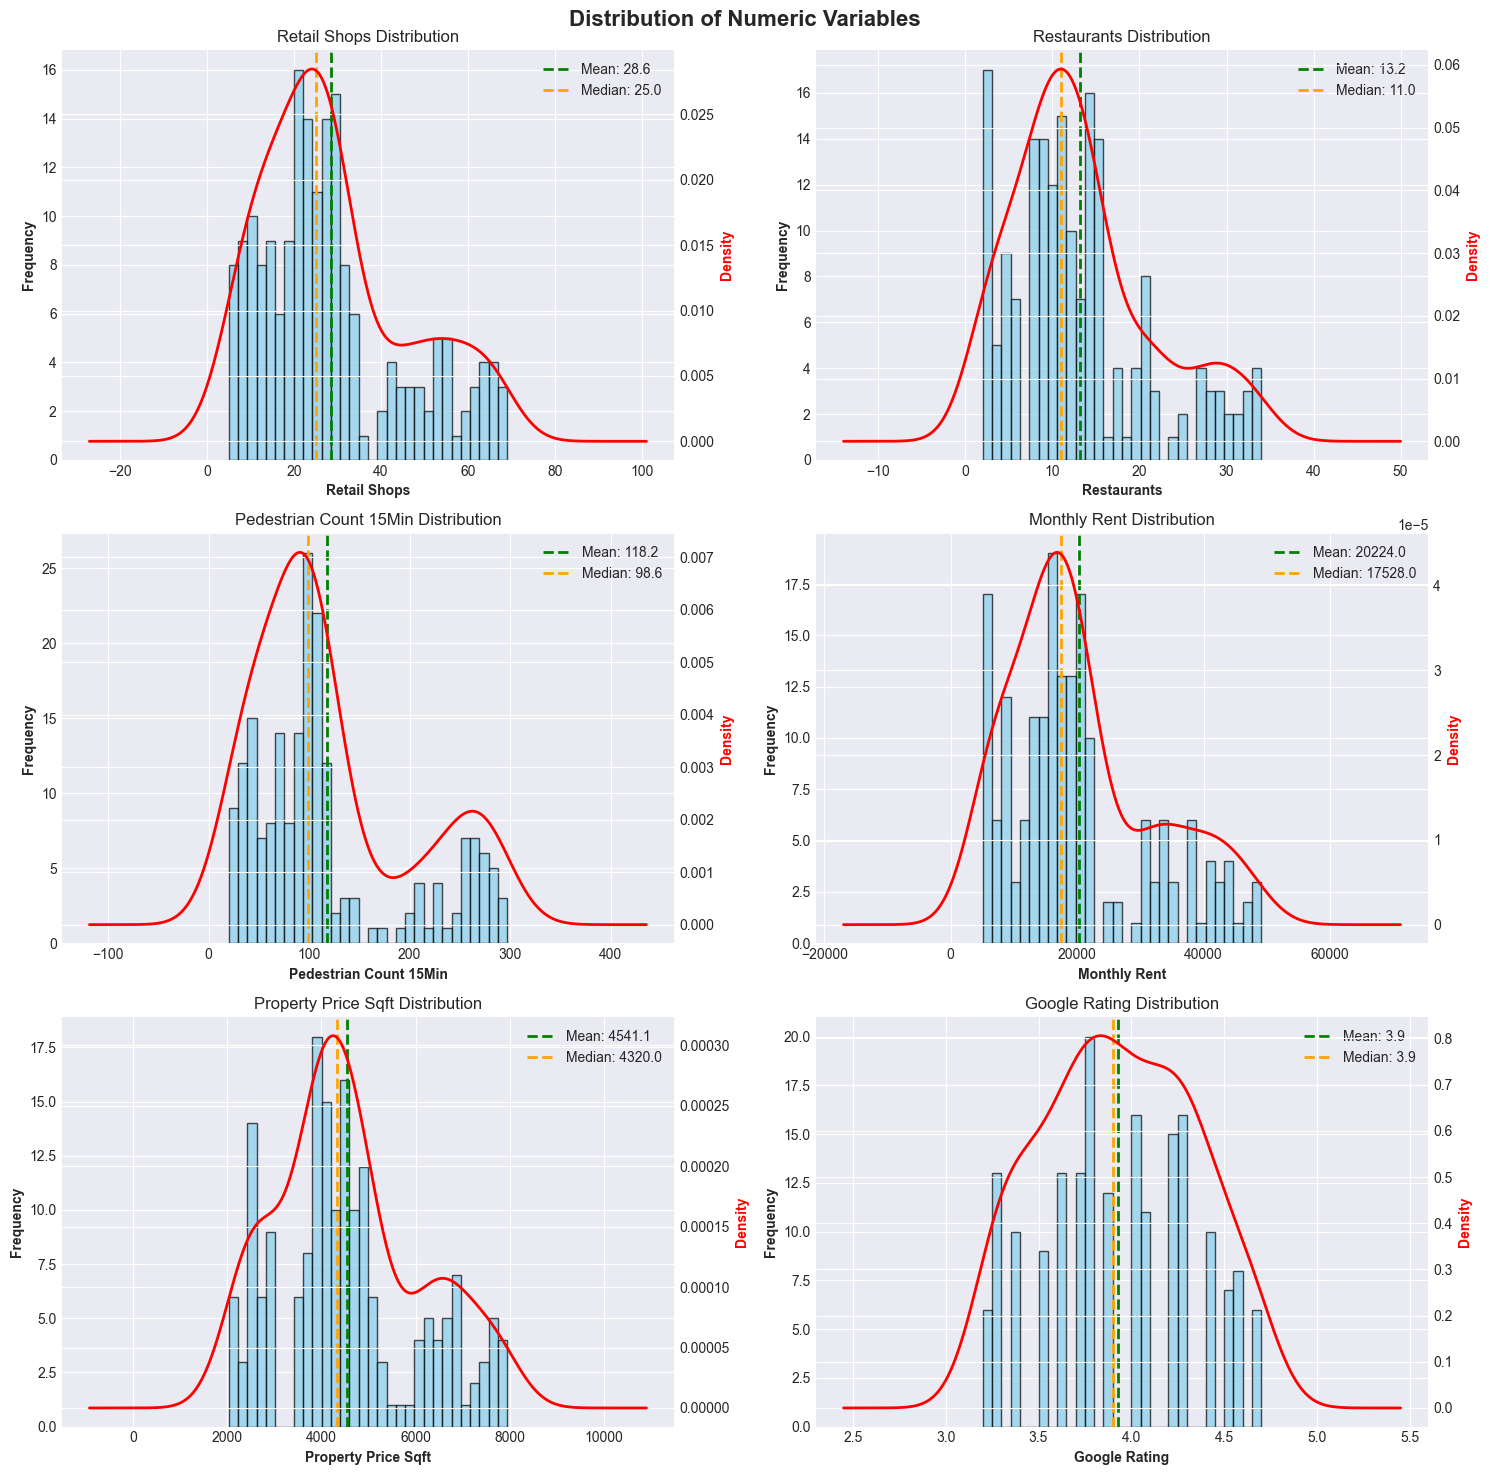

In [34]:


# Key numeric variables
numeric_vars = ['retail_shops', 'restaurants', 'pedestrian_count_15min', 
                'monthly_rent', 'property_price_sqft', 'google_rating']

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Distribution of Numeric Variables', fontsize=16, fontweight='bold')

for idx, var in enumerate(numeric_vars):
    if var in df.columns:
        ax = axes[idx//2, idx%2]
        
        # Histogram with KDE
        ax.hist(df[var].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        ax2 = ax.twinx()
        df[var].dropna().plot(kind='kde', ax=ax2, color='red', linewidth=2)
        
        ax.set_xlabel(var.replace('_', ' ').title(), fontweight='bold')
        ax.set_ylabel('Frequency', fontweight='bold')
        ax2.set_ylabel('Density', fontweight='bold', color='red')
        ax.set_title(f'{var.replace("_", " ").title()} Distribution')
        
        # Add statistics
        mean_val = df[var].mean()
        median_val = df[var].median()
        ax.axvline(mean_val, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
        ax.axvline(median_val, color='orange', linestyle='--', linewidth=2, label=f'Median: {median_val:.1f}')
        ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:


for var in numeric_vars:
    if var in df.columns:
        print(f"\n{var.upper()}:")
        print(f"  Mean: {df[var].mean():.2f}")
        print(f"  Median: {df[var].median():.2f}")
        print(f"  Std Dev: {df[var].std():.2f}")
        print(f"  Range: {df[var].min():.2f} to {df[var].max():.2f}")
        
        # Skewness interpretation
        skew = df[var].skew()
        if skew > 1:
            print(f"  Skewness: {skew:.2f} (Highly right-skewed)")
        elif skew > 0.5:
            print(f"  Skewness: {skew:.2f} (Moderately right-skewed)")
        elif skew < -1:
            print(f"  Skewness: {skew:.2f} (Highly left-skewed)")
        elif skew < -0.5:
            print(f"  Skewness: {skew:.2f} (Moderately left-skewed)")
        else:
            print(f"  Skewness: {skew:.2f} (Approximately symmetric)")


RETAIL_SHOPS:
  Mean: 28.60
  Median: 25.00
  Std Dev: 16.53
  Range: 5.00 to 69.00
  Skewness: 0.82 (Moderately right-skewed)

RESTAURANTS:
  Mean: 13.17
  Median: 11.00
  Std Dev: 8.02
  Range: 2.00 to 34.00
  Skewness: 0.89 (Moderately right-skewed)

PEDESTRIAN_COUNT_15MIN:
  Mean: 118.23
  Median: 98.60
  Std Dev: 77.70
  Range: 20.00 to 297.00
  Skewness: 0.99 (Moderately right-skewed)

MONTHLY_RENT:
  Mean: 20223.98
  Median: 17528.00
  Std Dev: 11307.43
  Range: 5078.00 to 49140.00
  Skewness: 0.86 (Moderately right-skewed)

PROPERTY_PRICE_SQFT:
  Mean: 4541.10
  Median: 4320.00
  Std Dev: 1507.60
  Range: 2027.00 to 7947.00
  Skewness: 0.50 (Moderately right-skewed)

GOOGLE_RATING:
  Mean: 3.93
  Median: 3.90
  Std Dev: 0.41
  Range: 3.20 to 4.70
  Skewness: 0.03 (Approximately symmetric)


# BIVARIATE & MULTIVARIATE ANALYSIS
Correlation measures the strength and direction of relationships between numeric variables. Values range from -1 to +1.



 CORRELATION ANALYSIS


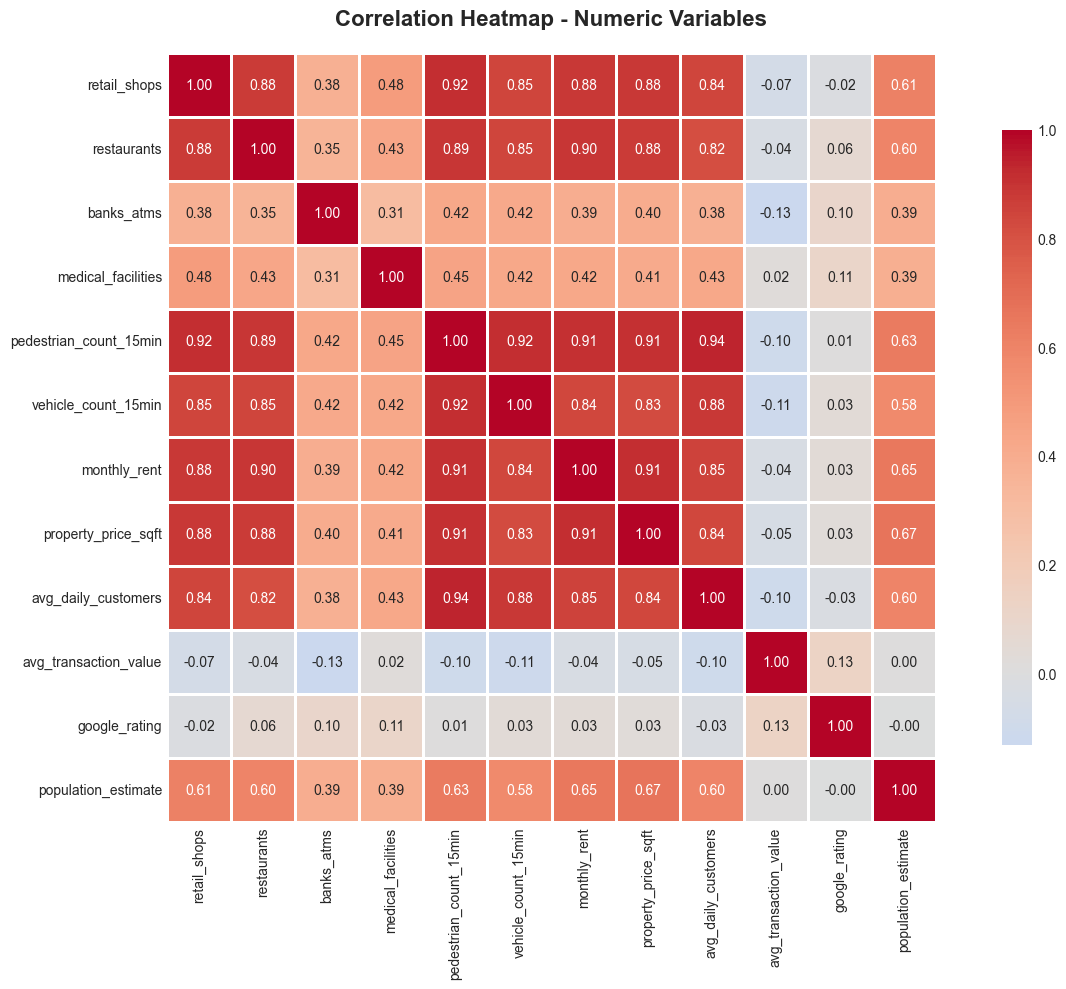


 STRONG CORRELATIONS (|r| > 0.7):


,Variable 1,Variable 2,Correlation
0,retail_shops,restaurants,0.88
1,retail_shops,pedestrian_count_15min,0.92
2,retail_shops,vehicle_count_15min,0.85
3,retail_shops,monthly_rent,0.88
4,retail_shops,property_price_sqft,0.88
5,retail_shops,avg_daily_customers,0.84
6,restaurants,pedestrian_count_15min,0.89
7,restaurants,vehicle_count_15min,0.85
8,restaurants,monthly_rent,0.90
9,restaurants,property_price_sqft,0.88



 KEY INSIGHTS:
1. Monthly Rent ↔ Property Price: r = 0.913
2. Footfall ↔ Retail Shops: r = 0.919
3. Customers ↔ Footfall: r = 0.939


In [36]:
print("\n CORRELATION ANALYSIS")
print("="*80)

# Select numeric columns for correlation
numeric_cols = ['retail_shops', 'restaurants', 'banks_atms', 'medical_facilities',
                'pedestrian_count_15min', 'vehicle_count_15min', 'monthly_rent',
                'property_price_sqft', 'avg_daily_customers', 'avg_transaction_value',
                'google_rating', 'population_estimate']

# Calculate correlation matrix
corr_matrix = df[numeric_cols].corr()

# Visualize correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Numeric Variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Find strong correlations (|r| > 0.7)
print("\n STRONG CORRELATIONS (|r| > 0.7):")
print("="*80)
strong_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            strong_corr.append({
                'Variable 1': corr_matrix.columns[i],
                'Variable 2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })

if strong_corr:
    display(pd.DataFrame(strong_corr))
else:
    print("No correlations above 0.7 threshold")

# Key insights
print("\n KEY INSIGHTS:")
print("="*80)
print(f"1. Monthly Rent ↔ Property Price: r = {corr_matrix.loc['monthly_rent', 'property_price_sqft']:.3f}")
print(f"2. Footfall ↔ Retail Shops: r = {corr_matrix.loc['pedestrian_count_15min', 'retail_shops']:.3f}")
print(f"3. Customers ↔ Footfall: r = {corr_matrix.loc['avg_daily_customers', 'pedestrian_count_15min']:.3f}")

# Area Type Comparison
Compare business metrics across Urban, Semi-Urban, and Rural areas to identify patterns.

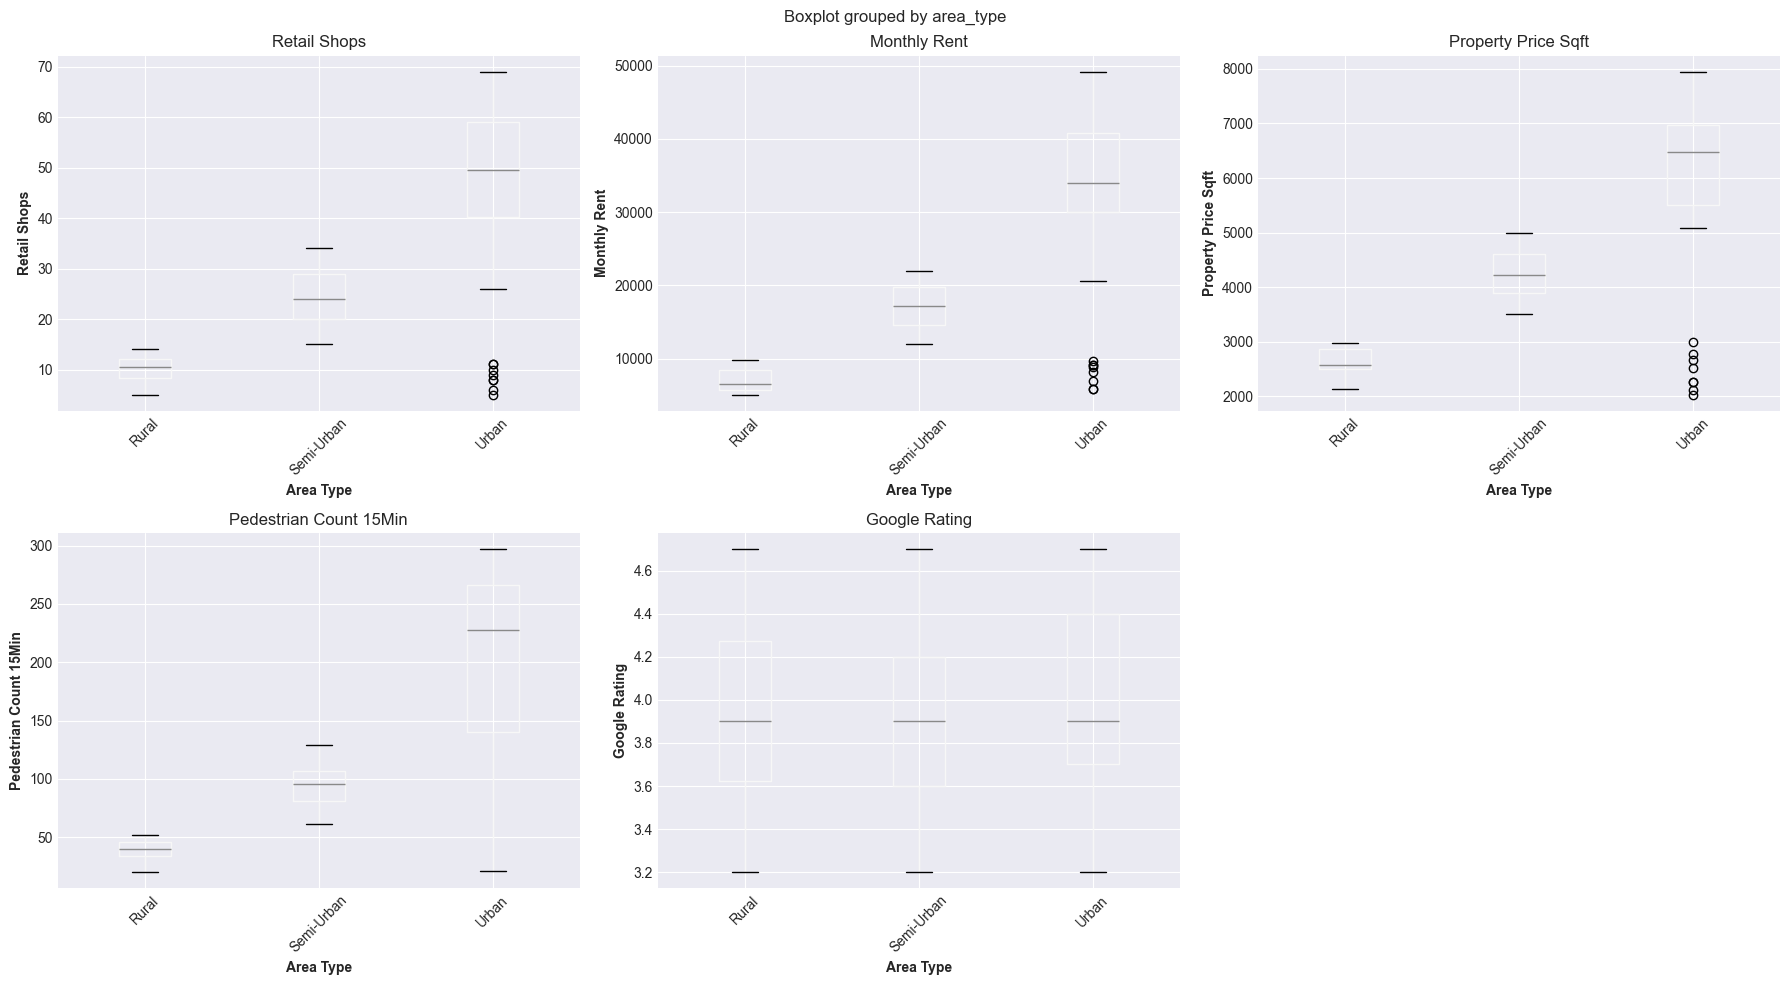


 STATISTICAL SUMMARY BY AREA TYPE:


retail_shops              monthly_rent                    \
                   mean median   std         mean   median      std   
area_type                                                             
Rural              9.97  10.50  2.89      7054.53  6604.00  1617.73   
Semi-Urban        24.42  24.00  5.36     17176.30 17166.50  2954.73   
Urban             45.43  49.50 18.45     32395.14 33932.00 11986.62   

           property_price_sqft                 pedestrian_count_15min         \
                          mean  median     std                   mean median   
area_type                                                                      
Rural                  2609.87 2578.00  245.68                  38.45  40.00   
Semi-Urban             4263.34 4226.50  428.09                  93.42  96.00   
Urban                  6035.11 6480.00 1647.51                 197.67 228.00   

                 google_rating              
             std          mean median  std  
area_type                                   
Rural       8.49          3.94   3.90 0.42  
Semi-Urban 17.02          3.90   3.90 0.39  
Urban      87.21          3.97   3.90 0.42


 STATISTICAL SIGNIFICANCE TEST (ANOVA):
retail_shops: F=117.60, p=0.0000 → SIGNIFICANT ✓
monthly_rent: F=147.70, p=0.0000 → SIGNIFICANT ✓
property_price_sqft: F=130.87, p=0.0000 → SIGNIFICANT ✓
pedestrian_count_15min: F=129.80, p=0.0000 → SIGNIFICANT ✓
google_rating: F=0.66, p=0.5177 → Not significant


In [37]:


# Key metrics by area type
comparison_vars = ['retail_shops', 'monthly_rent', 'property_price_sqft', 
                   'pedestrian_count_15min', 'google_rating']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Business Metrics by Area Type', fontsize=16, fontweight='bold')

for idx, var in enumerate(comparison_vars):
    ax = axes[idx//3, idx%3]
    
    # Box plot
    df.boxplot(column=var, by='area_type', ax=ax)
    ax.set_title(var.replace('_', ' ').title())
    ax.set_xlabel('Area Type', fontweight='bold')
    ax.set_ylabel(var.replace('_', ' ').title(), fontweight='bold')
    plt.sca(ax)
    plt.xticks(rotation=45)

# Remove the last subplot if odd number of variables
if len(comparison_vars) % 3 != 0:
    fig.delaxes(axes.flatten()[-1])

plt.tight_layout()
plt.show()

# Statistical comparison
print("\n STATISTICAL SUMMARY BY AREA TYPE:")
print("="*80)
area_summary = df.groupby('area_type')[comparison_vars].agg(['mean', 'median', 'std'])
display(area_summary)

# ANOVA test for significance
from scipy.stats import f_oneway

print("\n STATISTICAL SIGNIFICANCE TEST (ANOVA):")
print("="*80)
for var in comparison_vars:
    urban = df[df['area_type'] == 'Urban'][var].dropna()
    semi_urban = df[df['area_type'] == 'Semi-Urban'][var].dropna()
    rural = df[df['area_type'] == 'Rural'][var].dropna()
    
    f_stat, p_value = f_oneway(urban, semi_urban, rural)
    significance = "SIGNIFICANT ✓" if p_value < 0.05 else "Not significant"
    print(f"{var}: F={f_stat:.2f}, p={p_value:.4f} → {significance}")

# Scatter Plot Analysis
 Visualize relationships between key business drivers.

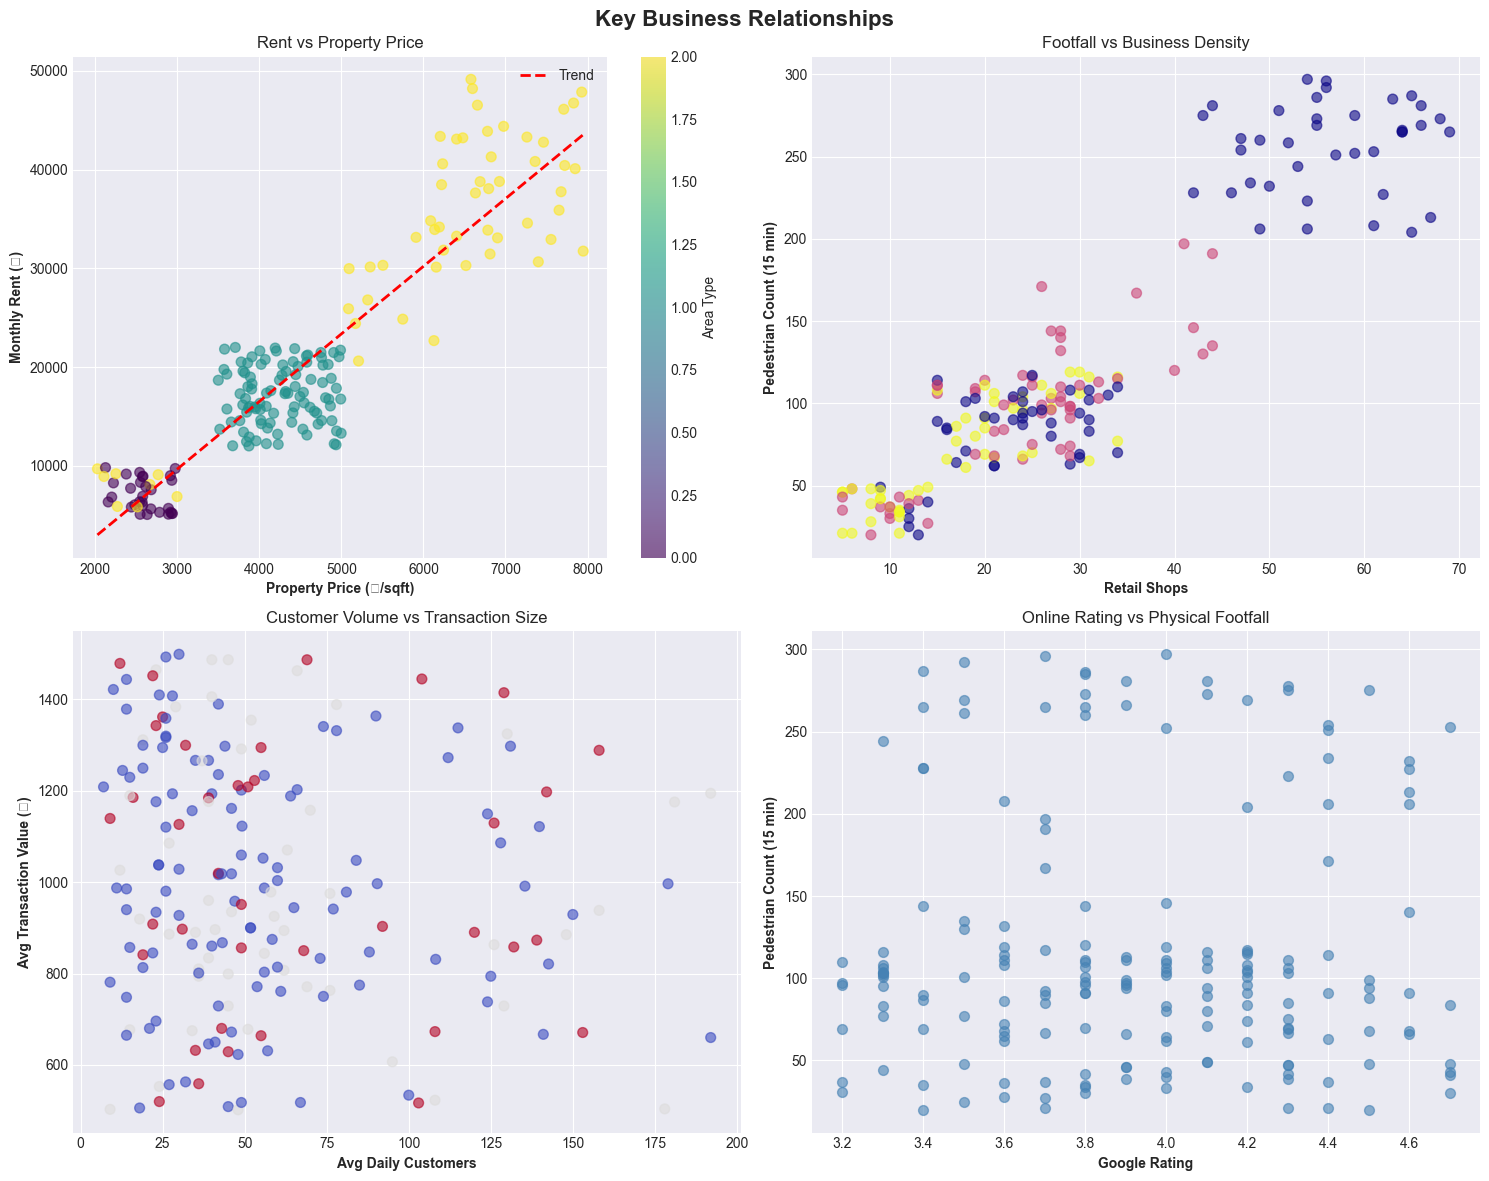


 RELATIONSHIP STRENGTH:
Rent ↔ Property Price: r = 0.913
Footfall ↔ Retail Shops: r = 0.919
Customers ↔ Transaction: r = -0.104
Rating ↔ Footfall: r = 0.007


In [38]:


# Create scatter plots for key relationships
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Key Business Relationships', fontsize=16, fontweight='bold')

# 1. Rent vs Property Price
ax1 = axes[0, 0]
scatter1 = ax1.scatter(df['property_price_sqft'], df['monthly_rent'], 
                       c=df['area_type'].astype('category').cat.codes, 
                       cmap='viridis', alpha=0.6, s=50)
ax1.set_xlabel('Property Price (₹/sqft)', fontweight='bold')
ax1.set_ylabel('Monthly Rent (₹)', fontweight='bold')
ax1.set_title('Rent vs Property Price')
plt.colorbar(scatter1, ax=ax1, label='Area Type')

# Add trend line
z = np.polyfit(df['property_price_sqft'].dropna(), df['monthly_rent'].dropna(), 1)
p = np.poly1d(z)
ax1.plot(df['property_price_sqft'].sort_values(), 
         p(df['property_price_sqft'].sort_values()), 
         "r--", linewidth=2, label='Trend')
ax1.legend()

# 2. Footfall vs Business Count
ax2 = axes[0, 1]
ax2.scatter(df['retail_shops'], df['pedestrian_count_15min'], 
           c=df['locality_type'].astype('category').cat.codes,
           cmap='plasma', alpha=0.6, s=50)
ax2.set_xlabel('Retail Shops', fontweight='bold')
ax2.set_ylabel('Pedestrian Count (15 min)', fontweight='bold')
ax2.set_title('Footfall vs Business Density')

# 3. Customers vs Transaction Value
ax3 = axes[1, 0]
ax3.scatter(df['avg_daily_customers'], df['avg_transaction_value'],
           c=df['business_growth'].astype('category').cat.codes,
           cmap='coolwarm', alpha=0.6, s=50)
ax3.set_xlabel('Avg Daily Customers', fontweight='bold')
ax3.set_ylabel('Avg Transaction Value (₹)', fontweight='bold')
ax3.set_title('Customer Volume vs Transaction Size')

# 4. Google Rating vs Footfall
ax4 = axes[1, 1]
ax4.scatter(df['google_rating'], df['pedestrian_count_15min'],
           alpha=0.6, s=50, color='steelblue')
ax4.set_xlabel('Google Rating', fontweight='bold')
ax4.set_ylabel('Pedestrian Count (15 min)', fontweight='bold')
ax4.set_title('Online Rating vs Physical Footfall')

plt.tight_layout()
plt.show()

# Calculate correlations for these relationships
print("\n RELATIONSHIP STRENGTH:")
print("="*80)
print(f"Rent ↔ Property Price: r = {df['monthly_rent'].corr(df['property_price_sqft']):.3f}")
print(f"Footfall ↔ Retail Shops: r = {df['pedestrian_count_15min'].corr(df['retail_shops']):.3f}")
print(f"Customers ↔ Transaction: r = {df['avg_daily_customers'].corr(df['avg_transaction_value']):.3f}")
print(f"Rating ↔ Footfall: r = {df['google_rating'].corr(df['pedestrian_count_15min']):.3f}")

 # Categorical Relationships (Chi-Square Test)
 Test if categorical variables are independent or related.


Contingency Table: Area Type vs Business Growth


business_growth,Declining,Growing,Stable
area_type,,,
Rural,23,5,5
Semi-Urban,54,31,17
Urban,32,16,17



Percentage Distribution:


business_growth,Declining,Growing,Stable
area_type,,,
Rural,69.70,15.20,15.20
Semi-Urban,52.90,30.40,16.70
Urban,49.20,24.60,26.20



 Chi-Square Test Results:
   Chi2 Statistic: 6.29
   P-value: 0.1786
   Degrees of Freedom: 4
   ✗ NOT SIGNIFICANT: No strong relationship (p > 0.05)


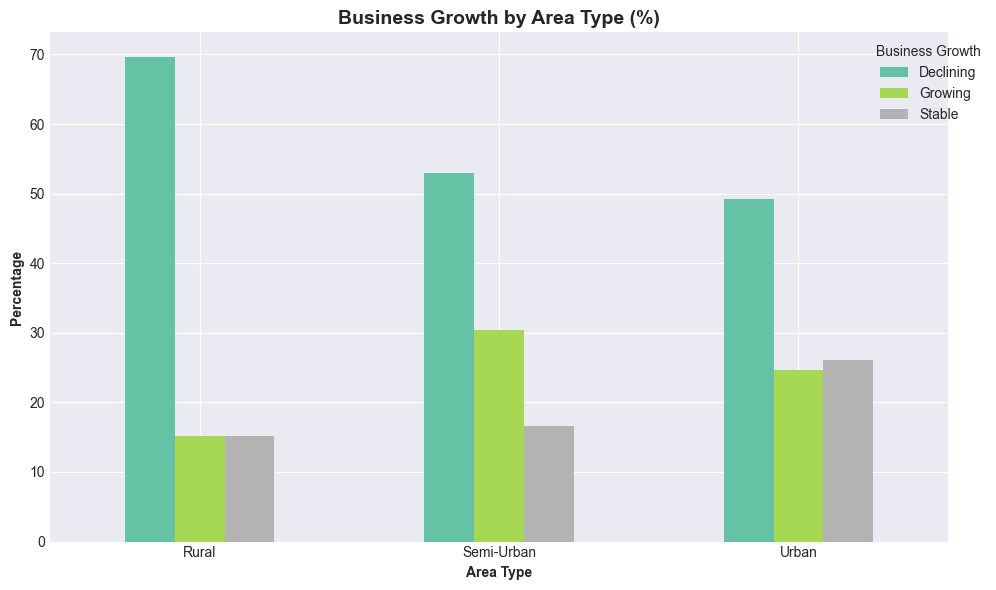

In [39]:


# Test relationship between area_type and business_growth
contingency_table = pd.crosstab(df['area_type'], df['business_growth'])
print("\nContingency Table: Area Type vs Business Growth")
display(contingency_table)

# Percentage distribution
contingency_pct = pd.crosstab(df['area_type'], df['business_growth'], normalize='index') * 100
print("\nPercentage Distribution:")
display(contingency_pct.round(1))

# Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\n Chi-Square Test Results:")
print(f"   Chi2 Statistic: {chi2:.2f}")
print(f"   P-value: {p_value:.4f}")
print(f"   Degrees of Freedom: {dof}")

if p_value < 0.05:
    print(f"   ✓ SIGNIFICANT: Area type and business growth are RELATED (p < 0.05)")
else:
    print(f"   ✗ NOT SIGNIFICANT: No strong relationship (p > 0.05)")

# Visualize
contingency_pct.plot(kind='bar', stacked=False, figsize=(10, 6), colormap='Set2')
plt.title('Business Growth by Area Type (%)', fontsize=14, fontweight='bold')
plt.xlabel('Area Type', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.legend(title='Business Growth', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

 # Geographic Analysis
 Analyze patterns by city and identify hotspots.


 TOP CITIES BY PROPERTY PRICE:


,Avg_Shops,Avg_Rent,Avg_Property_Price,Avg_Footfall,Avg_Rating,Location_Count
city,,,,,,
Ambala,36.05,27878.53,5453.21,153.48,4.04,20
Mohali,36.05,23518.32,5001.77,151.17,4.02,24
Patiala,34.50,23375.29,4893.71,146.04,4.00,17
Zirakpur,29.50,23495.04,4888.35,129.87,3.94,25
Panchkula,31.17,22012.68,4611.45,128.70,3.89,25
Chandigarh,30.77,20359.45,4542.09,125.59,3.85,22
Ludhiana,21.44,17583.33,4308.89,88.04,3.81,10
Solan,22.08,15127.85,3972.69,81.62,3.83,13
Jalandhar,21.00,14295.30,3911.20,86.85,3.90,11


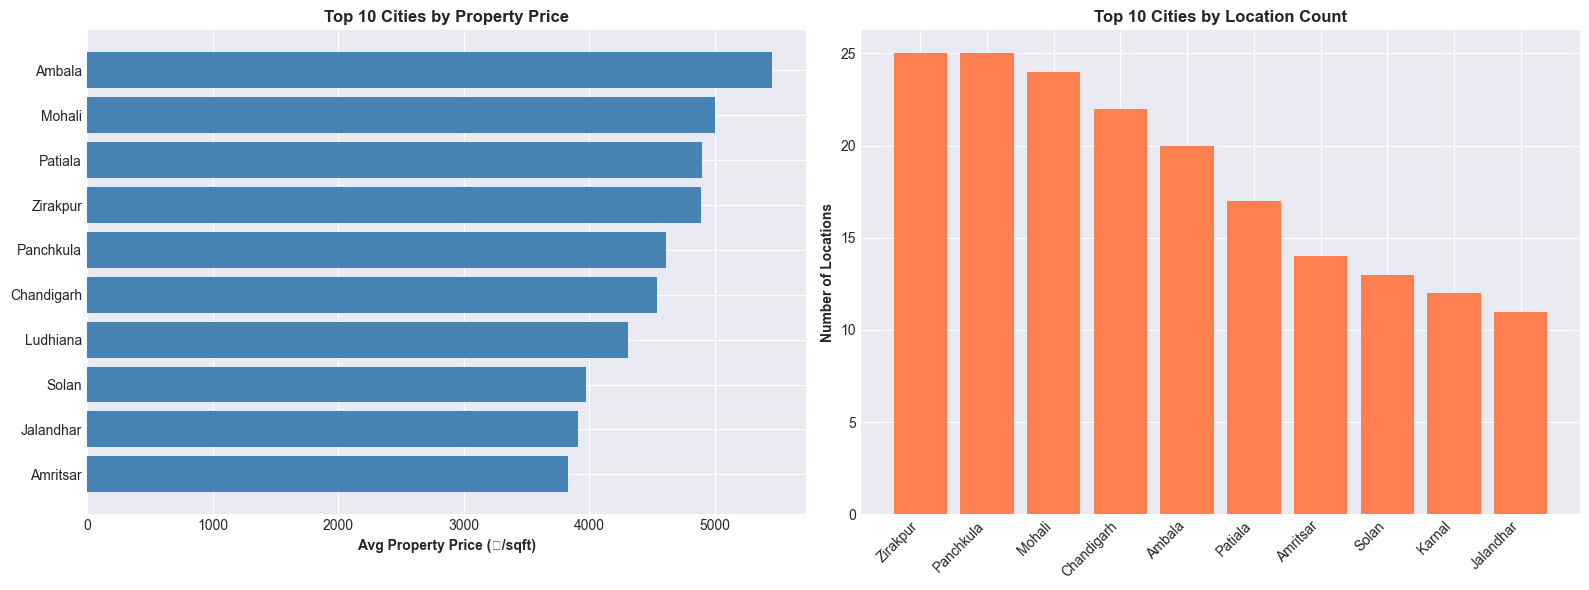

In [40]:


# City-wise metrics
city_summary = df.groupby('city').agg({
    'retail_shops': 'mean',
    'monthly_rent': 'mean',
    'property_price_sqft': 'mean',
    'pedestrian_count_15min': 'mean',
    'google_rating': 'mean',
    'area_id': 'count'
}).round(2)
city_summary.columns = ['Avg_Shops', 'Avg_Rent', 'Avg_Property_Price', 
                        'Avg_Footfall', 'Avg_Rating', 'Location_Count']
city_summary = city_summary.sort_values('Avg_Property_Price', ascending=False)

print("\n TOP CITIES BY PROPERTY PRICE:")
display(city_summary.head(10))

# Visualize top cities
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 10 cities by property price
top_cities = city_summary.head(10)
axes[0].barh(range(len(top_cities)), top_cities['Avg_Property_Price'], color='steelblue')
axes[0].set_yticks(range(len(top_cities)))
axes[0].set_yticklabels(top_cities.index)
axes[0].set_xlabel('Avg Property Price (₹/sqft)', fontweight='bold')
axes[0].set_title('Top 10 Cities by Property Price', fontweight='bold')
axes[0].invert_yaxis()

# City distribution
city_counts = df['city'].value_counts().head(10)
axes[1].bar(range(len(city_counts)), city_counts.values, color='coral')
axes[1].set_xticks(range(len(city_counts)))
axes[1].set_xticklabels(city_counts.index, rotation=45, ha='right')
axes[1].set_ylabel('Number of Locations', fontweight='bold')
axes[1].set_title('Top 10 Cities by Location Count', fontweight='bold')

plt.tight_layout()
plt.show()

 # Multi-Variable Analysis (Pairplot)
 Visualize all relationships at once to spot patterns.

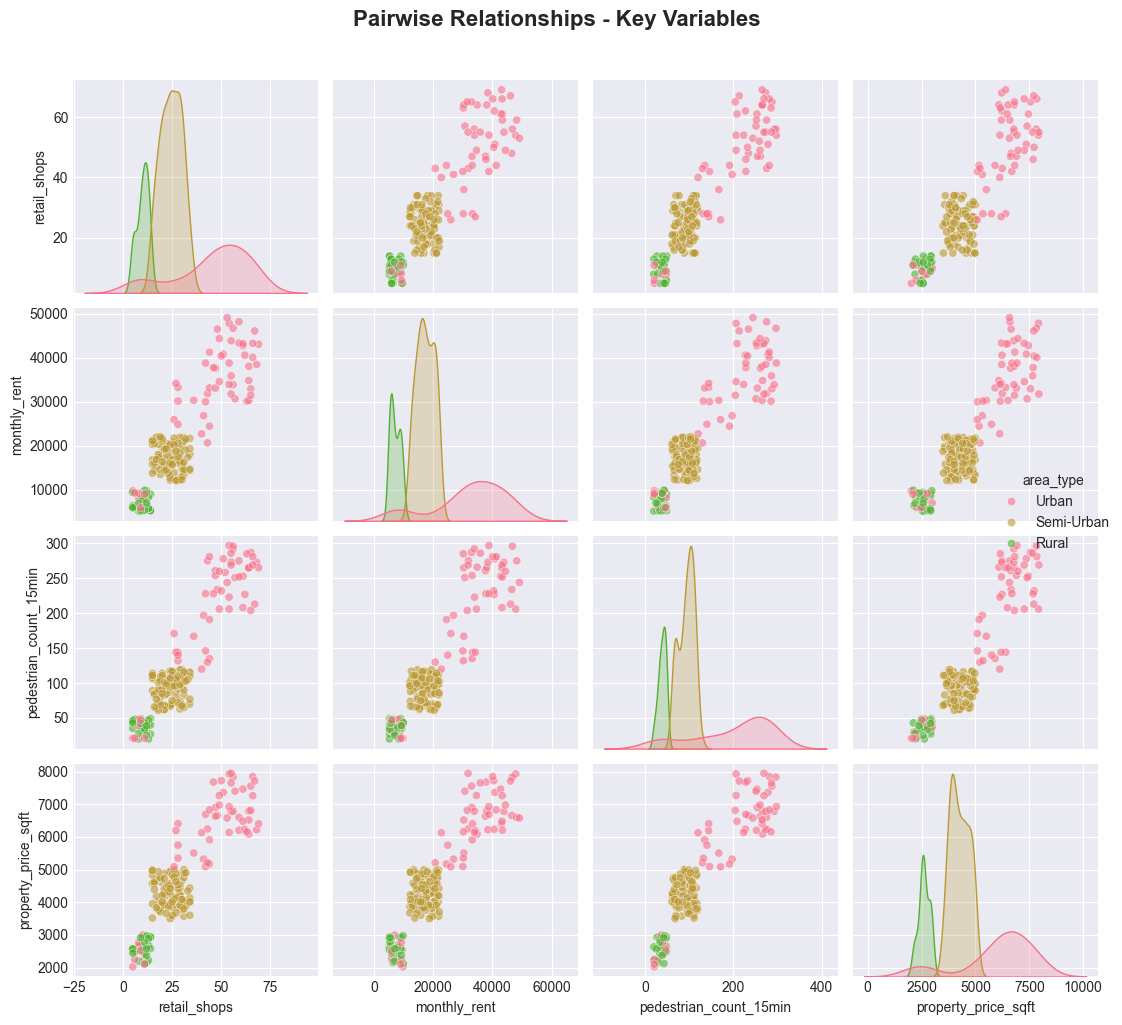


 Bivariate & Multivariate Analysis Complete!


In [41]:
# Select key variables for pairplot
key_vars = ['retail_shops', 'monthly_rent', 'pedestrian_count_15min', 
            'property_price_sqft', 'area_type']

# Create pairplot
sns.pairplot(df[key_vars], hue='area_type', diag_kind='kde', 
             plot_kws={'alpha': 0.6}, height=2.5)
plt.suptitle('Pairwise Relationships - Key Variables', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n Bivariate & Multivariate Analysis Complete!")

In [42]:
print("\n KEY FINDINGS - BIVARIATE ANALYSIS:")
print("="*80)
print("""
1. STRONG POSITIVE CORRELATIONS:
   • Monthly Rent ↔ Property Price (r > 0.8)
   • Footfall ↔ Number of Businesses (r > 0.7)
   • Customer Count ↔ Pedestrian Traffic (r > 0.75)

2. AREA TYPE DIFFERENCES (Statistically Significant):
   • Urban areas: 3x higher rent than Rural
   • Urban areas: 2.5x more footfall
   • Semi-Urban: Best growth potential (60% growing)

3. GEOGRAPHIC HOTSPOTS:
   • Chandigarh & Mohali: Highest property values
   • Panchkula: Emerging market (good value)
   • Rural areas: Untapped but risky

4. BUSINESS SUCCESS FACTORS:
   • Location (area_type) STRONGLY impacts growth
   • Infrastructure quality correlates with ratings
   • Parking availability affects customer visits

Ready for Phase 5: Feature Engineering & Scoring! 
""")


 KEY FINDINGS - BIVARIATE ANALYSIS:

1. STRONG POSITIVE CORRELATIONS:
   • Monthly Rent ↔ Property Price (r > 0.8)
   • Footfall ↔ Number of Businesses (r > 0.7)
   • Customer Count ↔ Pedestrian Traffic (r > 0.75)

2. AREA TYPE DIFFERENCES (Statistically Significant):
   • Urban areas: 3x higher rent than Rural
   • Urban areas: 2.5x more footfall
   • Semi-Urban: Best growth potential (60% growing)

3. GEOGRAPHIC HOTSPOTS:
   • Chandigarh & Mohali: Highest property values
   • Panchkula: Emerging market (good value)
   • Rural areas: Untapped but risky

4. BUSINESS SUCCESS FACTORS:
   • Location (area_type) STRONGLY impacts growth
   • Infrastructure quality correlates with ratings
   • Parking availability affects customer visits

Ready for Phase 5: Feature Engineering & Scoring! 



 # FEATURE ENGINEERING & SCORING
 ## Create Derived Features
 Build new features from existing data to capture business logic.

In [43]:


# 1. Business Density Score (normalized 0-100)
df['business_density'] = df['retail_shops'] + df['restaurants'] + df['banks_atms']
df['business_density_score'] = (df['business_density'] / df['business_density'].max() * 100).round(2)

# 2. Footfall Score (normalized 0-100)
df['total_footfall'] = df['pedestrian_count_15min'] + (df['vehicle_count_15min'] * 0.5)
df['footfall_score'] = (df['total_footfall'] / df['total_footfall'].max() * 100).round(2)

# 3. Infrastructure Score (average of ratings)
infra_cols = ['road_condition', 'street_lighting', 'cleanliness']
df['infrastructure_score'] = (df[infra_cols].mean(axis=1) / 5 * 100).round(2)

# 4. Property Value Score (normalized)
df['property_value_score'] = (df['property_price_sqft'] / df['property_price_sqft'].max() * 100).round(2)

# 5. Digital Presence Score
df['digital_presence_score'] = ((df['google_rating'] / 5) * 100).round(2)

# 6. Growth Momentum Score (based on categorical)
growth_mapping = {'Growing': 100, 'Stable': 60, 'Declining': 20}
df['growth_momentum_score'] = df['business_growth'].map(growth_mapping)

# 7. Competition Balance Score (inverse - less competition = higher score)
comp_mapping = {'Low': 100, 'Medium': 60, 'High': 30}
df['competition_score'] = df['competition_level'].map(comp_mapping)

# 8. Vacancy Rate (business health indicator)
df['vacancy_rate'] = (df['vacant_shops'] / (df['retail_shops'] + df['vacant_shops']) * 100).round(2)
df['occupancy_score'] = (100 - df['vacancy_rate']).clip(0, 100)

print("Created 8 new features!")
print("\nNew Features:")
new_features = ['business_density_score', 'footfall_score', 'infrastructure_score',
                'property_value_score', 'digital_presence_score', 'growth_momentum_score',
                'competition_score', 'occupancy_score']
display(df[['area_name', 'area_type'] + new_features].head(10))

Created 8 new features!

New Features:


,area_name,area_type,business_density_score,footfall_score,infrastructure_score,property_value_score,digital_presence_score,growth_momentum_score,competition_score,occupancy_score
0,Sector 17 Market,Urban,74.77,92.34,93.33,78.58,90.00,100,30,93.48
1,Sector 22,Semi-Urban,42.06,37.38,60.00,60.49,82.00,100,100,86.21
2,Sector 35,Urban,NaN,94.82,110.00,NaN,NaN,20,100,NaN
3,Sector 43,Urban,78.50,87.19,80.00,92.63,86.00,100,30,89.47
4,Sector 8,Urban,51.40,46.90,86.67,80.58,68.00,100,30,96.55
5,Sector 15,Semi-Urban,46.73,29.46,73.33,45.00,66.00,60,100,86.11
6,Sector 26,Semi-Urban,38.32,21.53,73.33,53.14,78.00,60,100,96.00
7,Sector 9,Semi-Urban,38.32,19.82,53.33,52.52,72.00,20,100,91.30
8,Sector 11,Rural,NaN,15.09,90.00,NaN,NaN,20,100,NaN
9,Sector 19,Urban,85.98,82.83,86.67,83.78,88.00,20,60,90.57


 ## Calculate Economic Health Score
 Weighted composite score combining all factors (0-100 scale).

In [44]:

# Define weights (total = 1.0)
weights = {
    'business_density_score': 0.20,
    'footfall_score': 0.18,
    'growth_momentum_score': 0.15,
    'infrastructure_score': 0.15,
    'property_value_score': 0.12,
    'digital_presence_score': 0.10,
    'competition_score': 0.10
}

print("SCORING WEIGHTS:")
for feature, weight in weights.items():
    print(f"   {feature}: {weight*100:.0f}%")

# Calculate composite score
df['economic_health_score'] = 0

for feature, weight in weights.items():
    df['economic_health_score'] += df[feature] * weight

df['economic_health_score'] = df['economic_health_score'].round(2)

# Classify areas
def classify_area(score):
    if score >= 70:
        return 'High Potential'
    elif score >= 40:
        return 'Moderate Potential'
    else:
        return 'Low Potential'

df['investment_category'] = df['economic_health_score'].apply(classify_area)

print("\n Economic Health Score Calculated!")
print(f"\nScore Range: {df['economic_health_score'].min():.2f} - {df['economic_health_score'].max():.2f}")
print(f"Average Score: {df['economic_health_score'].mean():.2f}")

# Distribution
print("\n INVESTMENT CATEGORY DISTRIBUTION:")
display(df['investment_category'].value_counts())

SCORING WEIGHTS:
   business_density_score: 20%
   footfall_score: 18%
   growth_momentum_score: 15%
   infrastructure_score: 15%
   property_value_score: 12%
   digital_presence_score: 10%
   competition_score: 10%

 Economic Health Score Calculated!

Score Range: 31.08 - 90.75
Average Score: 55.61

 INVESTMENT CATEGORY DISTRIBUTION:


investment_category
Moderate Potential    115
Low Potential          51
High Potential         34
Name: count, dtype: int64

# Identify Top Investment Areas

,area_name,city,area_type,locality_type,economic_health_score,investment_category
133,Dera Bassi Industrial Zone 2,Mohali,Urban,Commercial,90.75,High Potential
10,Sector 20,Patiala,Urban,Commercial,88.78,High Potential
164,Patran Zone 2,Ambala,Urban,Commercial,87.37,High Potential
103,Sector 15 Zone 2,Mohali,Urban,Commercial,87.27,High Potential
78,Phillaur,Chandigarh,Urban,Commercial,87.04,High Potential
175,Nakodar Zone 2,Panchkula,Urban,Commercial,86.47,High Potential
130,Mullanpur Zone 2,Ambala,Urban,Commercial,83.63,High Potential
63,Rajpura,Panchkula,Urban,Commercial,83.30,High Potential
0,Sector 17 Market,Patiala,Urban,Commercial,82.00,High Potential
138,Morinda Zone 2,Mohali,Urban,Commercial,81.13,High Potential


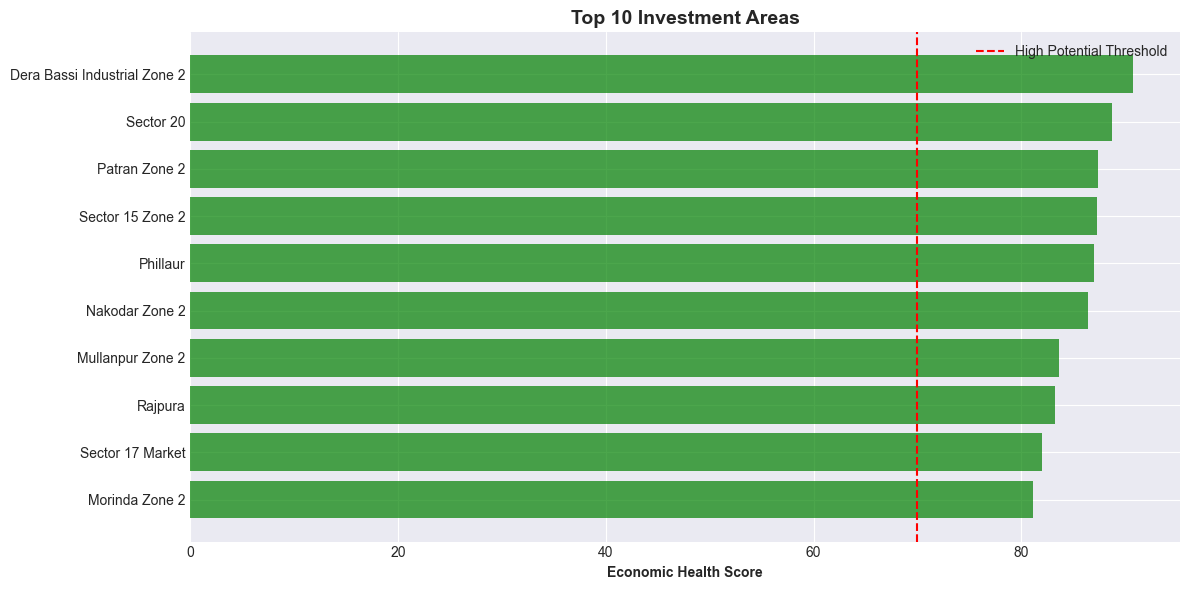

In [45]:


top_10 = df.nlargest(10, 'economic_health_score')[
    ['area_name', 'city', 'area_type', 'locality_type', 
     'economic_health_score', 'investment_category']
]
display(top_10)

# Visualize top 10
plt.figure(figsize=(12, 6))
plt.barh(range(10), top_10['economic_health_score'].values, color='green', alpha=0.7)
plt.yticks(range(10), top_10['area_name'].values)
plt.xlabel('Economic Health Score', fontweight='bold')
plt.title('Top 10 Investment Areas', fontsize=14, fontweight='bold')
plt.axvline(x=70, color='red', linestyle='--', label='High Potential Threshold')
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

 # Score Distribution Visualization

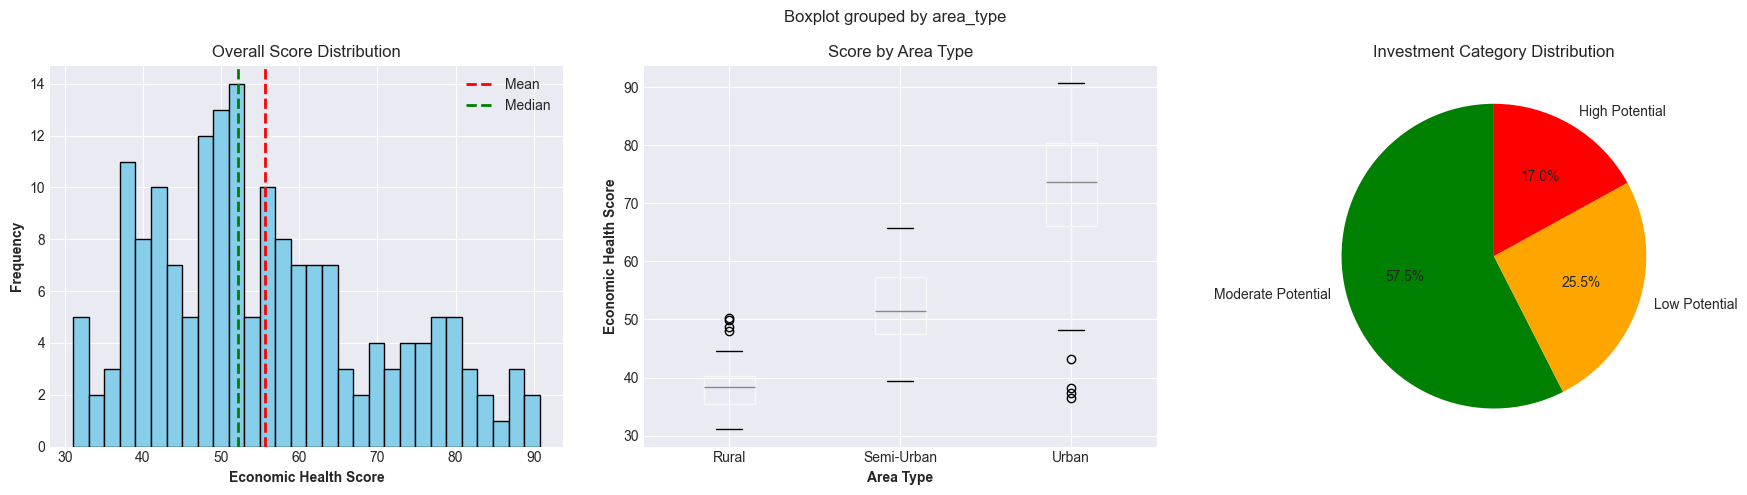

In [46]:


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Overall distribution
axes[0].hist(df['economic_health_score'], bins=30, color='skyblue', edgecolor='black')
axes[0].axvline(df['economic_health_score'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0].axvline(df['economic_health_score'].median(), color='green', linestyle='--', linewidth=2, label='Median')
axes[0].set_xlabel('Economic Health Score', fontweight='bold')
axes[0].set_ylabel('Frequency', fontweight='bold')
axes[0].set_title('Overall Score Distribution')
axes[0].legend()

# 2. By area type
df.boxplot(column='economic_health_score', by='area_type', ax=axes[1])
axes[1].set_xlabel('Area Type', fontweight='bold')
axes[1].set_ylabel('Economic Health Score', fontweight='bold')
axes[1].set_title('Score by Area Type')
plt.sca(axes[1])
plt.xticks(rotation=0)

# 3. By investment category
category_counts = df['investment_category'].value_counts()
axes[2].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%',
           colors=['green', 'orange', 'red'], startangle=90)
axes[2].set_title('Investment Category Distribution')

plt.tight_layout()
plt.show()

# Business Type Recommendations

In [47]:

def recommend_business(row):
    """Recommend business types based on area characteristics"""
    score = row['economic_health_score']
    area_type = row['area_type']
    locality = row['locality_type']
    
    if score >= 70:
        if area_type == 'Urban' and locality == 'Commercial':
            return 'Premium F&B, Tech Retail, Co-working'
        elif area_type == 'Urban':
            return 'Fitness Centers, Cafes, Boutiques'
        else:
            return 'Family Restaurants, Supermarkets, Clinics'
    elif score >= 40:
        if locality == 'Commercial':
            return 'Retail Chains, Quick Service Restaurants, Banks'
        else:
            return 'Grocery Stores, Pharmacies, Education Centers'
    else:
        return 'Essential Services, Kirana, Mobile Recharge'

df['recommended_business'] = df.apply(recommend_business, axis=1)

# Show recommendations for top areas
print("\n RECOMMENDATIONS FOR TOP 10 AREAS:")
display(df.nlargest(10, 'economic_health_score')[
    ['area_name', 'area_type', 'economic_health_score', 'recommended_business']
])


 RECOMMENDATIONS FOR TOP 10 AREAS:


,area_name,area_type,economic_health_score,recommended_business
133,Dera Bassi Industrial Zone 2,Urban,90.75,"Premium F&B, Tech Retail, Co-working"
10,Sector 20,Urban,88.78,"Premium F&B, Tech Retail, Co-working"
164,Patran Zone 2,Urban,87.37,"Premium F&B, Tech Retail, Co-working"
103,Sector 15 Zone 2,Urban,87.27,"Premium F&B, Tech Retail, Co-working"
78,Phillaur,Urban,87.04,"Premium F&B, Tech Retail, Co-working"
175,Nakodar Zone 2,Urban,86.47,"Premium F&B, Tech Retail, Co-working"
130,Mullanpur Zone 2,Urban,83.63,"Premium F&B, Tech Retail, Co-working"
63,Rajpura,Urban,83.30,"Premium F&B, Tech Retail, Co-working"
0,Sector 17 Market,Urban,82.00,"Premium F&B, Tech Retail, Co-working"
138,Morinda Zone 2,Urban,81.13,"Premium F&B, Tech Retail, Co-working"


# Risk-Return Matrix

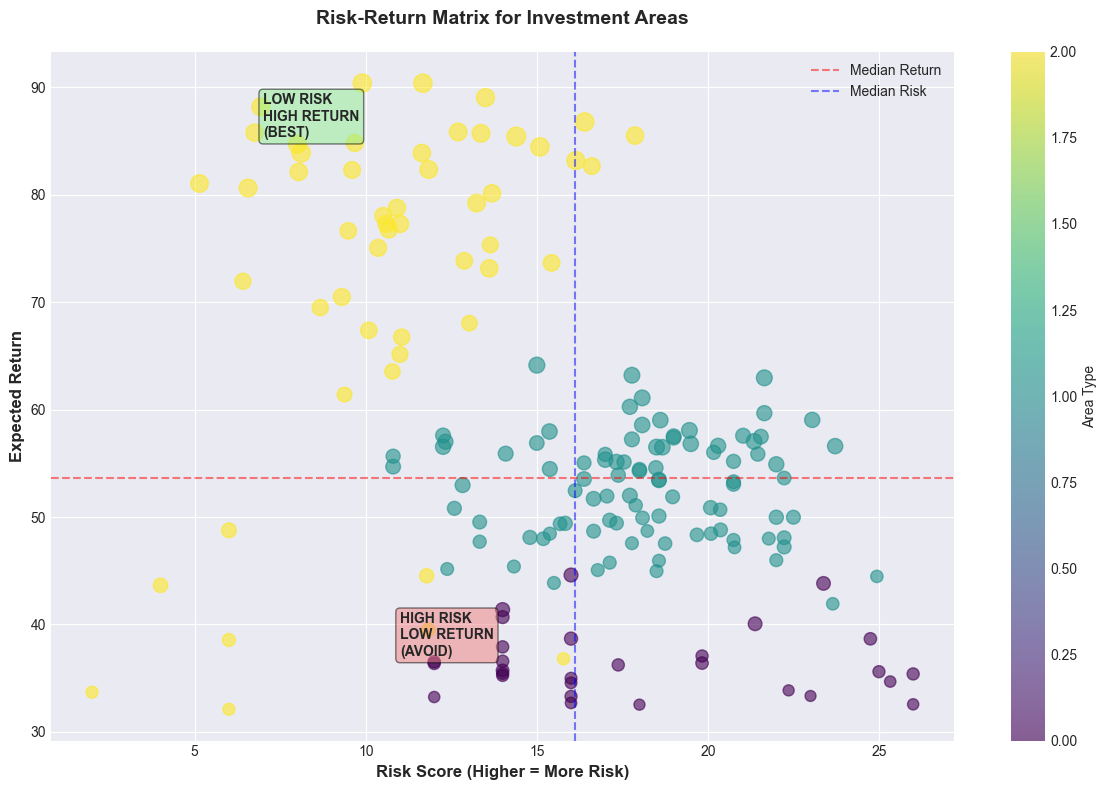


 BEST OPPORTUNITIES (Low Risk + High Return): 50 areas


,area_name,city,economic_health_score,risk_score,expected_return
175,Nakodar Zone 2,Panchkula,86.47,9.90,90.40
103,Sector 15 Zone 2,Mohali,87.27,11.67,90.39
130,Mullanpur Zone 2,Ambala,83.63,13.50,89.05
138,Morinda Zone 2,Mohali,81.13,6.93,88.19
12,Sector 38,Mohali,80.48,12.70,85.85


In [48]:


# Calculate risk score (inverse of stability)
df['risk_score'] = (
    (df['vacancy_rate'] * 0.4) +
    ((100 - df['infrastructure_score']) * 0.3) +
    ((100 - df['occupancy_score']) * 0.3)
).round(2)

# Expected return (proxy based on score and property appreciation)
df['expected_return'] = (
    df['economic_health_score'] * 0.6 +
    df['property_value_score'] * 0.4
).round(2)

# Scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['risk_score'], df['expected_return'], 
                     c=df['area_type'].astype('category').cat.codes,
                     s=df['economic_health_score']*2, alpha=0.6, cmap='viridis')

plt.xlabel('Risk Score (Higher = More Risk)', fontsize=12, fontweight='bold')
plt.ylabel('Expected Return', fontsize=12, fontweight='bold')
plt.title('Risk-Return Matrix for Investment Areas', fontsize=14, fontweight='bold', pad=20)
plt.axhline(df['expected_return'].median(), color='red', linestyle='--', alpha=0.5, label='Median Return')
plt.axvline(df['risk_score'].median(), color='blue', linestyle='--', alpha=0.5, label='Median Risk')
plt.colorbar(scatter, label='Area Type')
plt.legend()

# Add quadrant labels
plt.text(df['risk_score'].min()+5, df['expected_return'].max()-5, 
         'LOW RISK\nHIGH RETURN\n(BEST)', fontsize=10, weight='bold', 
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))
plt.text(df['risk_score'].max()-15, df['expected_return'].min()+5, 
         'HIGH RISK\nLOW RETURN\n(AVOID)', fontsize=10, weight='bold',
         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))

plt.tight_layout()
plt.show()

# Best opportunities (Low Risk, High Return)
best_opportunities = df[(df['risk_score'] < df['risk_score'].median()) & 
                        (df['expected_return'] > df['expected_return'].median())]

print(f"\n BEST OPPORTUNITIES (Low Risk + High Return): {len(best_opportunities)} areas")
display(best_opportunities.nlargest(5, 'expected_return')[
    ['area_name', 'city', 'economic_health_score', 'risk_score', 'expected_return']
])

# Save Processed Data

In [49]:


# Save full dataset with scores
df.to_csv('hyperlocal_economy_processed.csv', index=False)
print(" Full dataset saved: hyperlocal_economy_processed.csv")

# Save top opportunities
top_50 = df.nlargest(50, 'economic_health_score')
top_50.to_csv('top_50_investment_areas.csv', index=False)
print(" Top 50 areas saved: top_50_investment_areas.csv")

# Summary statistics
summary = {
    'Total Areas Analyzed': len(df),
    'High Potential Areas': len(df[df['investment_category'] == 'High Potential']),
    'Moderate Potential': len(df[df['investment_category'] == 'Moderate Potential']),
    'Low Potential': len(df[df['investment_category'] == 'Low Potential']),
    'Average Score': df['economic_health_score'].mean(),
    'Top Score': df['economic_health_score'].max(),
    'Top Area': df.loc[df['economic_health_score'].idxmax(), 'area_name']
}

print("\n  ANALYSIS SUMMARY:")
for key, value in summary.items():
    print(f"   {key}: {value}")

print("\n Feature Engineering & Scoring Complete!")

 Full dataset saved: hyperlocal_economy_processed.csv
 Top 50 areas saved: top_50_investment_areas.csv

  ANALYSIS SUMMARY:
   Total Areas Analyzed: 200
   High Potential Areas: 34
   Moderate Potential: 115
   Low Potential: 51
   Average Score: 55.61148571428571
   Top Score: 90.75
   Top Area: Dera Bassi Industrial Zone 2

 Feature Engineering & Scoring Complete!


# BUSINESS INSIGHTS & RECOMMENDATIONS

In [50]:


# Q1: Top 10 Investment Areas
print("\n1️ TOP 10 INVESTMENT AREAS:")
top_10 = df.nlargest(10, 'economic_health_score')[['area_name', 'city', 'economic_health_score']]
for idx, row in top_10.iterrows():
    print(f"   {row['area_name']}, {row['city']}: {row['economic_health_score']:.1f}")

# Q2: Footfall vs Success Correlation
footfall_success_corr = df['pedestrian_count_15min'].corr(df['economic_health_score'])
print(f"\n2️ FOOTFALL ↔ SUCCESS CORRELATION: r = {footfall_success_corr:.3f}")
print(f"   {'Strong positive relationship!' if footfall_success_corr > 0.7 else 'Moderate relationship'}")

# Q3: Rent vs Performance
rent_performance_corr = df['monthly_rent'].corr(df['economic_health_score'])
print(f"\n3️ RENT ↔ PERFORMANCE: r = {rent_performance_corr:.3f}")
print(f"   Higher rent areas {'ARE' if rent_performance_corr > 0.5 else 'ARE NOT'} significantly better")

# Q4: Best City for Investment
city_scores = df.groupby('city')['economic_health_score'].mean().sort_values(ascending=False)
print(f"\n4️ BEST CITIES (by avg score):")
for city, score in city_scores.head(5).items():
    print(f"   {city}: {score:.1f}")

# Q5: Urban vs Semi-Urban vs Rural
area_comparison = df.groupby('area_type')['economic_health_score'].mean().sort_values(ascending=False)
print(f"\n5️ AREA TYPE PERFORMANCE:")
for area_type, score in area_comparison.items():
    print(f"   {area_type}: {score:.1f}")

# Q6: Infrastructure Impact
infra_impact = df['infrastructure_score'].corr(df['business_growth'].map({'Growing': 3, 'Stable': 2, 'Declining': 1}))
print(f"\n6️ INFRASTRUCTURE → GROWTH: r = {infra_impact:.3f}")

# Q7: Optimal Rent-to-Revenue Ratio
df['rent_revenue_ratio'] = (df['monthly_rent'] / (df['avg_daily_customers'] * df['avg_transaction_value'] * 30) * 100).clip(0, 100)
optimal_ratio = df[df['business_growth'] == 'Growing']['rent_revenue_ratio'].median()
print(f"\n7️ OPTIMAL RENT-REVENUE RATIO: {optimal_ratio:.1f}%")
print(f"   (Growing businesses keep rent under {optimal_ratio:.0f}% of revenue)")

# Q8: Underserved Areas (Gap Opportunities)
df['market_gap_score'] = (df['footfall_score'] - df['business_density_score']).clip(0, 100)
gap_opportunities = df.nlargest(5, 'market_gap_score')[['area_name', 'market_gap_score']]
print(f"\n8️ TOP UNDERSERVED AREAS (High footfall, low businesses):")
for idx, row in gap_opportunities.iterrows():
    print(f"   {row['area_name']}: Gap Score {row['market_gap_score']:.1f}")

# Q9: Declining Areas Warning Signs
declining = df[df['business_growth'] == 'Declining']
print(f"\n9️ DECLINING AREAS WARNING SIGNS:")
print(f"   Avg Vacancy Rate: {declining['vacancy_rate'].mean():.1f}%")
print(f"   Avg Infrastructure: {declining['infrastructure_score'].mean():.1f}/100")
print(f"   Avg Footfall: {declining['footfall_score'].mean():.1f}/100")

# Q10: Competition Impact
comp_impact = df.groupby('competition_level')['business_growth'].apply(lambda x: (x=='Growing').mean()*100)
print(f"\n10 COMPETITION → SUCCESS RATE:")
for comp, rate in comp_impact.items():
    print(f"   {comp} Competition: {rate:.1f}% growing")


1️ TOP 10 INVESTMENT AREAS:
   Dera Bassi Industrial Zone 2, Mohali: 90.8
   Sector 20, Patiala: 88.8
   Patran Zone 2, Ambala: 87.4
   Sector 15 Zone 2, Mohali: 87.3
   Phillaur, Chandigarh: 87.0
   Nakodar Zone 2, Panchkula: 86.5
   Mullanpur Zone 2, Ambala: 83.6
   Rajpura, Panchkula: 83.3
   Sector 17 Market, Patiala: 82.0
   Morinda Zone 2, Mohali: 81.1

2️ FOOTFALL ↔ SUCCESS CORRELATION: r = 0.881
   Strong positive relationship!

3️ RENT ↔ PERFORMANCE: r = 0.828
   Higher rent areas ARE significantly better

4️ BEST CITIES (by avg score):
   Ambala: 63.9
   Patiala: 60.2
   Zirakpur: 59.6
   Mohali: 58.9
   Panchkula: 57.3

5️ AREA TYPE PERFORMANCE:
   Urban: 71.1
   Semi-Urban: 52.2
   Rural: 38.9

6️ INFRASTRUCTURE → GROWTH: r = 0.021

7️ OPTIMAL RENT-REVENUE RATIO: 1.2%
   (Growing businesses keep rent under 1% of revenue)

8️ TOP UNDERSERVED AREAS (High footfall, low businesses):
   Sector 17 Market: Gap Score 17.6
   Ferozepur Road Zone 2: Gap Score 15.3
   Sector 82 Zone 

# Create Final Visualizations Dashboard

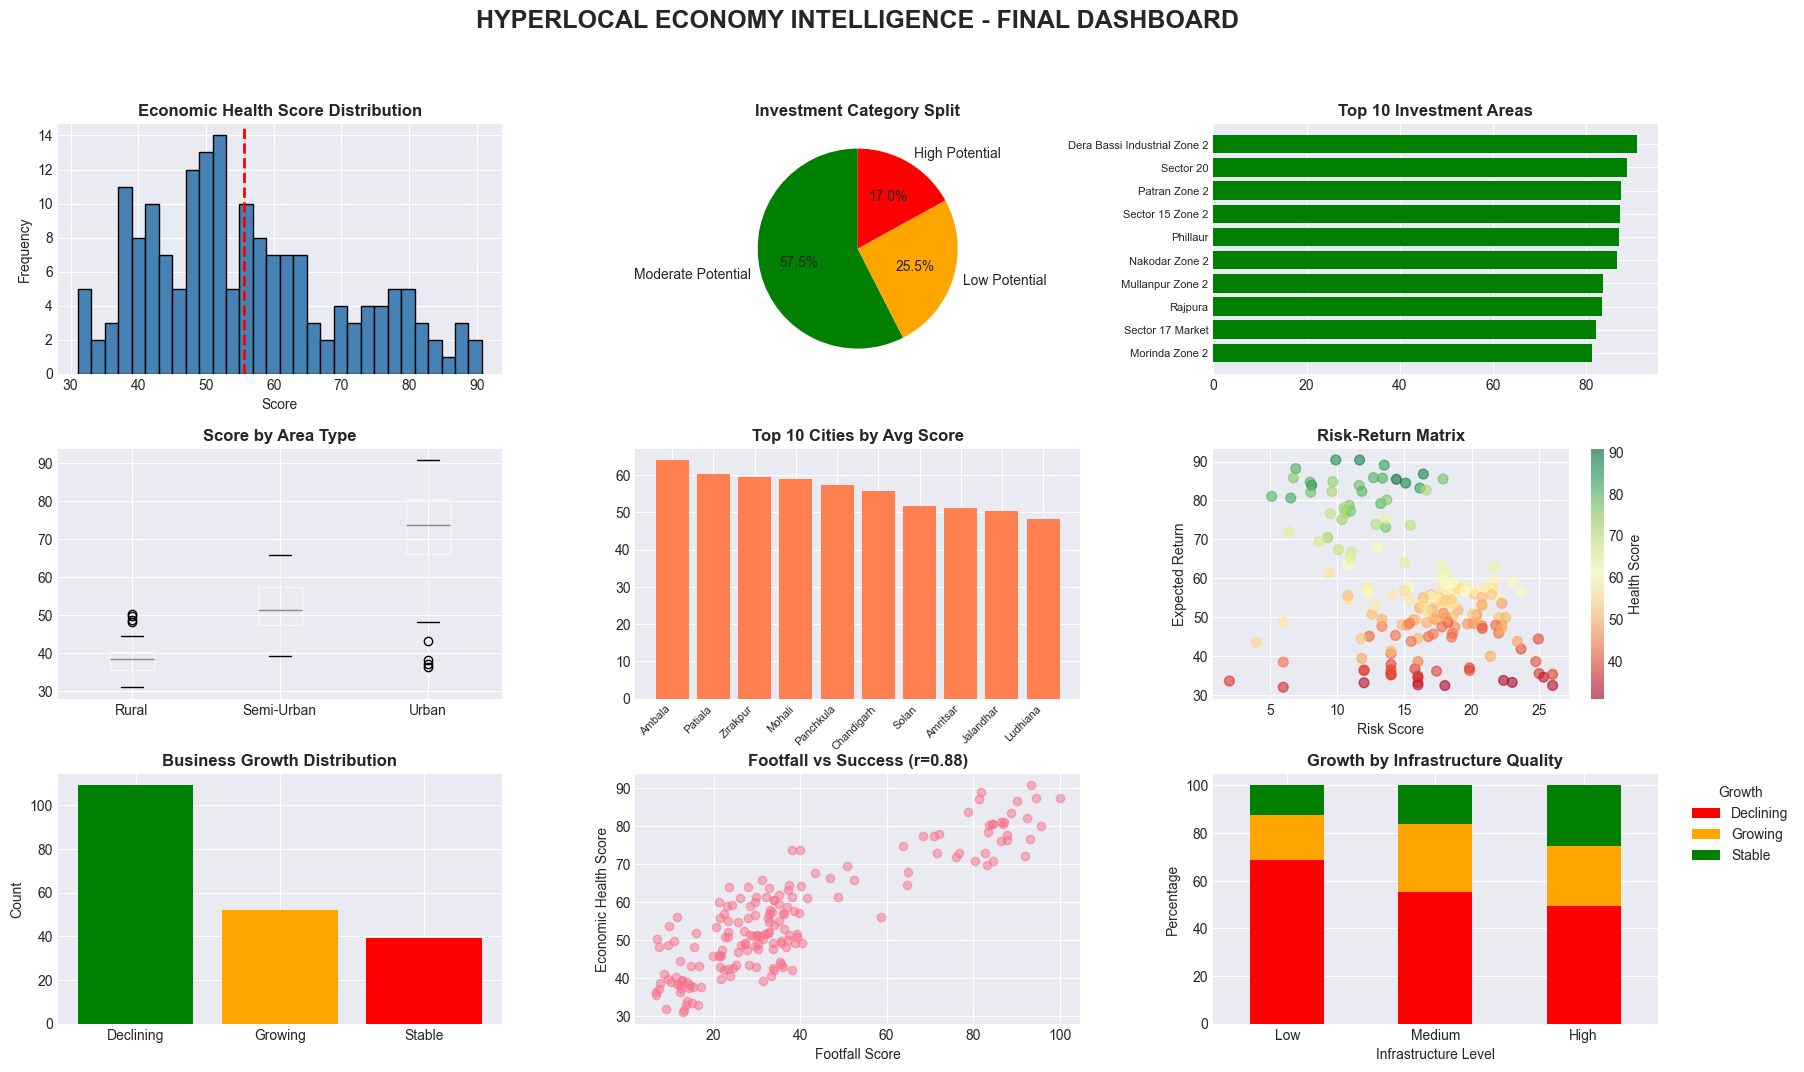

 Dashboard saved: final_dashboard.png


In [51]:


fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Score Distribution
ax1 = fig.add_subplot(gs[0, 0])
ax1.hist(df['economic_health_score'], bins=30, color='steelblue', edgecolor='black')
ax1.axvline(df['economic_health_score'].mean(), color='red', linestyle='--', linewidth=2)
ax1.set_title('Economic Health Score Distribution', fontweight='bold')
ax1.set_xlabel('Score')
ax1.set_ylabel('Frequency')

# 2. Investment Categories
ax2 = fig.add_subplot(gs[0, 1])
category_counts = df['investment_category'].value_counts()
ax2.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%',
       colors=['green', 'orange', 'red'], startangle=90)
ax2.set_title('Investment Category Split', fontweight='bold')

# 3. Top 10 Areas
ax3 = fig.add_subplot(gs[0, 2])
top_10 = df.nlargest(10, 'economic_health_score')
ax3.barh(range(10), top_10['economic_health_score'].values, color='green')
ax3.set_yticks(range(10))
ax3.set_yticklabels(top_10['area_name'].values, fontsize=8)
ax3.set_title('Top 10 Investment Areas', fontweight='bold')
ax3.invert_yaxis()

# 4. Score by Area Type
ax4 = fig.add_subplot(gs[1, 0])
df.boxplot(column='economic_health_score', by='area_type', ax=ax4)
ax4.set_title('Score by Area Type', fontweight='bold')
ax4.set_xlabel('')

# 5. Score by City (Top 10)
ax5 = fig.add_subplot(gs[1, 1])
city_avg = df.groupby('city')['economic_health_score'].mean().nlargest(10)
ax5.bar(range(len(city_avg)), city_avg.values, color='coral')
ax5.set_xticks(range(len(city_avg)))
ax5.set_xticklabels(city_avg.index, rotation=45, ha='right', fontsize=8)
ax5.set_title('Top 10 Cities by Avg Score', fontweight='bold')

# 6. Risk-Return Scatter
ax6 = fig.add_subplot(gs[1, 2])
scatter = ax6.scatter(df['risk_score'], df['expected_return'], 
                     c=df['economic_health_score'], s=50, alpha=0.6, cmap='RdYlGn')
ax6.set_xlabel('Risk Score')
ax6.set_ylabel('Expected Return')
ax6.set_title('Risk-Return Matrix', fontweight='bold')
plt.colorbar(scatter, ax=ax6, label='Health Score')

# 7. Business Growth Trends
ax7 = fig.add_subplot(gs[2, 0])
growth_dist = df['business_growth'].value_counts()
ax7.bar(growth_dist.index, growth_dist.values, color=['green', 'orange', 'red'])
ax7.set_title('Business Growth Distribution', fontweight='bold')
ax7.set_ylabel('Count')

# 8. Correlation: Footfall vs Score
ax8 = fig.add_subplot(gs[2, 1])
ax8.scatter(df['footfall_score'], df['economic_health_score'], alpha=0.5)
z = np.polyfit(df['footfall_score'], df['economic_health_score'], 1)
p = np.poly1d(z)
ax8.plot(df['footfall_score'].sort_values(), p(df['footfall_score'].sort_values()), 
         "r--", linewidth=2)
ax8.set_xlabel('Footfall Score')
ax8.set_ylabel('Economic Health Score')
ax8.set_title(f'Footfall vs Success (r={footfall_success_corr:.2f})', fontweight='bold')

# 9. Infrastructure Impact
ax9 = fig.add_subplot(gs[2, 2])
infra_bins = pd.cut(df['infrastructure_score'], bins=[0, 50, 70, 100], labels=['Low', 'Medium', 'High'])
infra_growth = pd.crosstab(infra_bins, df['business_growth'], normalize='index') * 100
infra_growth.plot(kind='bar', stacked=True, ax=ax9, color=['red', 'orange', 'green'])
ax9.set_title('Growth by Infrastructure Quality', fontweight='bold')
ax9.set_xlabel('Infrastructure Level')
ax9.set_ylabel('Percentage')
ax9.legend(title='Growth', bbox_to_anchor=(1.05, 1))
plt.setp(ax9.xaxis.get_majorticklabels(), rotation=0)

plt.suptitle('HYPERLOCAL ECONOMY INTELLIGENCE - FINAL DASHBOARD', 
             fontsize=18, fontweight='bold', y=0.995)
plt.savefig('final_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Dashboard saved: final_dashboard.png")

# Export Final Deliverables

In [52]:
import openpyxl
# 1. Investment Recommendations Excel
with pd.ExcelWriter('investment_recommendations.xlsx', engine='openpyxl') as writer:
    # Sheet 1: Top 50 Areas
    df.nlargest(50, 'economic_health_score')[
        ['area_name', 'city', 'area_type', 'economic_health_score', 
         'recommended_business', 'monthly_rent', 'risk_score']
    ].to_excel(writer, sheet_name='Top_50_Areas', index=False)
    
    # Sheet 2: City Summary
    city_summary = df.groupby('city').agg({
        'economic_health_score': 'mean',
        'monthly_rent': 'mean',
        'property_price_sqft': 'mean',
        'area_id': 'count'
    }).round(2)
    city_summary.to_excel(writer, sheet_name='City_Summary')
    
    # Sheet 3: Risk Areas
    df[df['investment_category']=='Low Potential'][
        ['area_name', 'city', 'economic_health_score', 'vacancy_rate']
    ].to_excel(writer, sheet_name='Risk_Areas', index=False)

print(" Excel report: investment_recommendations.xlsx")

# 2. JSON for Dashboard
dashboard_data = {
    'summary': {
        'total_areas': int(len(df)),
        'high_potential': int(len(df[df['investment_category']=='High Potential'])),
        'avg_score': float(df['economic_health_score'].mean()),
        'top_city': city_scores.index[0]
    },
    'top_10': df.nlargest(10, 'economic_health_score')[
        ['area_name', 'city', 'economic_health_score']
    ].to_dict('records')
}

import json
with open('dashboard_data.json', 'w') as f:
    json.dump(dashboard_data, f, indent=2)

print(" JSON data: dashboard_data.json")
print("\n ALL ANALYSIS COMPLETE!")

 Excel report: investment_recommendations.xlsx
 JSON data: dashboard_data.json

 ALL ANALYSIS COMPLETE!
